![](https://static0.givemesportimages.com/wordpress/wp-content/uploads/2024/01/study-names-the-10-most-expensive-players-in-the-world-image-1.jpg)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>


### <b><span style='color:#FFCE30'> 1.1 |</span> Background</b>

1. **Project Objective:** 
- To develop a machine learning tool that scrapes footballer data from sofifa.com and predicts player market values.

2. **Target Users:**
- Football club managers for scouting and signing new talent.
- Sports analysts for performance evaluation and market trend analysis.
- Fantasy football enthusiasts for creating winning teams.
- Sports betting individuals for informed wagering decisions.
3. **Use Case:**
- Assisting clubs in identifying undervalued players for cost-effective acquisitions.
- Enabling better salary negotiations based on predicted market value.
- Providing insights into player potential and career progression.
4. **Business Value:**
- For Football Clubs: Optimizes transfer budgets by highlighting undervalued players and avoiding overpayments.
- For Users: Offers a competitive edge in fantasy leagues and betting by understanding player worth.
5. **Technical Approach:**
- Web scraping to collect comprehensive player data from sofifa.com.
- Data preprocessing to clean and structure the dataset for analysis.
- Feature selection to identify key attributes influencing market value.
- Model training using regression algorithms to predict player values.
6. **Expected Outcome:**
- A robust predictive model capable of estimating player market values with high accuracy.
- Insights into the factors that most significantly affect player valuation.


### <b><span style='color:#FFCE30'> 1.2 |</span> Purpose of eda.ipynb</b>

An EDA notebook is essential for ensuring that the data fed into the machine learning model is well-understood and appropriately prepared, leading to more reliable and interpretable results.
It will consist some of these elements:

1. **Data Understanding:** EDA helps in gaining a thorough understanding of the dataset’s characteristics and structure.
2. **Data Quality Assessment:** Identifies missing values, outliers, and data inconsistencies that could affect model performance.
3. **Feature Insight:** Uncovers patterns, correlations, and trends among the features that can influence the model’s predictions.
4. **Hypothesis Generation:** Facilitates the formulation of hypotheses about the factors affecting footballer market values.
5. **Data Visualization:** Employs graphical representations to communicate findings and insights effectively.
6. **Preliminary Decision Making:** Guides the selection of appropriate machine learning algorithms based on the data’s nature.
7. **Reporting:** Provides a documented analysis flow that can be reviewed by stakeholders for transparency and reproducibility.


### <b><span style='color:#FFCE30'> 1.3 |</span> Background Research for Context</b>

> The valuation of football players is a complex and dynamic process influenced by a myriad of factors ranging from on-field performance to marketability off the pitch. With the advent of big data and advanced analytics, the ability to predict a player’s market value has become increasingly sophisticated and crucial for the strategic planning of football clubs.

> **Statistical Modeling Techniques:** Traditional approaches have utilized various statistical modeling techniques to predict the market value of top players. These models often incorporate a wide range of data, including personal information, annual performance statistics, and expert opinions. The process typically involves collecting and organizing data into dependent and independent variables, testing different models, and making predictions through the most effective model.

> **Machine Learning Models:** More recent studies have explored the use of machine learning algorithms such as Multiple Linear Regression, Support Vector Regression, and Random Forest Regression. These models are trained on datasets that include player skills and characteristics, often derived from sources like football video games, which provide a comprehensive set of attributes2. The predictive power of these models varies, with some achieving significant accuracy in estimating transfer values.

> **Deep Learning Approaches:** Deep learning, a subset of machine learning, has also been applied to predict football match outcomes, which can indirectly inform player valuations. By drawing features from extensive datasets, deep learning models can uncover complex patterns and relationships that may not be immediately apparent through traditional statistical methods.

> The goal of such predictive analysis is not only to estimate a player’s worth accurately but also to understand the underlying factors that drive these valuations. This knowledge can empower football clubs to make more informed decisions regarding player acquisitions and investments, ultimately leading to better financial and sporting outcomes. As the field continues to evolve, the integration of diverse data sources and advanced analytical techniques is likely to enhance the precision and reliability of player valuation models. 


### <b><span style='color:#FFCE30'> 1.4 |</span> References</b>

- https://yulasozen.medium.com/predicting-football-players-market-value-using-machine-learning-b28be298e91e#:~:text=The%20application%20of%20linear%20regression,and%20contribute%20to%20accurate%20forecasts.
- https://medium.com/analytics-vidhya/machine-learning-project-predicting-football-players-market-value-fd40636462bf
- https://github.com/Tola-adelase/predicting-market-value-of-football-players-using-machine-learning-algorithm
- https://www.footballbenchmark.com/library/player_valuation_putting_data_to_work_on_transfer_market_analysis
- https://arxiv.org/abs/2206.13246
- https://github.com/ohadmavdali/Predict-football-players-value-using-ML
- https://arxiv.org/abs/2403.07669
- https://www.stat.berkeley.edu/~aldous/Research/Ugrad/Yuan_He.pdf
- https://arno.uvt.nl/show.cgi?fid=161188


### <b><span style='color:#FFCE30'> 1.5 |</span> Assumptions</b>

When undertaking a machine learning project that involves extracting and using data from third-party sources like Sofifa, it’s important to establish some key assumptions to guide the project’s development and ensure its integrity. Here are some assumptions considered:

- **Data Representation:** Assume that the data from Sofifa is a reasonable proxy for the players’ real-world performance and attributes, despite not being official statistics.
- **Data Completeness:** Assume that the dataset includes all relevant features that could influence a player’s market value, acknowledging that some potentially influential factors might not be captured.
- **Data Accuracy:** While the data may not be perfect, assume it is accurate enough to build a predictive model that can provide valuable insights.
- **Data Consistency:** Assume that the way data is recorded and presented on Sofifa remains consistent over time, allowing for reliable longitudinal analyses.
- **Model Applicability:** Assume that the patterns and relationships discovered in the data are applicable to the real-world market values of football players.
- **Market Dynamics:** Acknowledge that the football market is subject to fluctuations and external influences that may not be entirely captured by the model.



# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>IMPORT LIBRARIES AND DATASET</b></div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup as bts
import re
import time

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb #import model for feature importance analysis

In [81]:
# def getAndParseURL(url):
#     result = requests.get(url, headers={"User-Agent":"Mozilla/5.0"}) # Safari/537.36. Chrome/103.0.0.0
#     soup = bts(result.text, "html.parser")
#     return soup

In [82]:
# try to download another set using this source as it has all columns
# https://sofifa.com/players?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=jt&showCol%5B%5D=le&showCol%5B%5D=wk&showCol%5B%5D=sk&showCol%5B%5D=aw&showCol%5B%5D=dw&showCol%5B%5D=bt&showCol%5B%5D=hc&showCol%5B%5D=phy&showCol%5B%5D=t1&showCol%5B%5D=t2&showCol%5B%5D=ps1&showCol%5B%5D=ps2&showCol%5B%5D=tc

In [83]:
# pages = ["https://sofifa.com/players?showCol%5B0%5D=pi&showCol%5B1%5D=ae&showCol%5B2%5D=hi&showCol%5B3%5D=wi&showCol%5B4%5D=pf&showCol%5B5%5D=oa&showCol%5B6%5D=pt&showCol%5B7%5D=bo&showCol%5B8%5D=bp&showCol%5B9%5D=gu&showCol%5B10%5D=vl&showCol%5B11%5D=wg&showCol%5B12%5D=rc&showCol%5B13%5D=ta&showCol%5B14%5D=cr&showCol%5B15%5D=fi&showCol%5B16%5D=he&showCol%5B17%5D=sh&showCol%5B18%5D=vo&showCol%5B19%5D=ts&showCol%5B20%5D=dr&showCol%5B21%5D=cu&showCol%5B22%5D=fr&showCol%5B23%5D=lo&showCol%5B24%5D=bl&showCol%5B25%5D=to&showCol%5B26%5D=ac&showCol%5B27%5D=sp&showCol%5B28%5D=ag&showCol%5B29%5D=re&showCol%5B30%5D=ba&showCol%5B31%5D=tp&showCol%5B32%5D=so&showCol%5B33%5D=ju&showCol%5B34%5D=st&showCol%5B35%5D=sr&showCol%5B36%5D=ln&showCol%5B37%5D=te&showCol%5B38%5D=ar&showCol%5B39%5D=in&showCol%5B40%5D=po&showCol%5B41%5D=vi&showCol%5B42%5D=pe&showCol%5B43%5D=cm&showCol%5B44%5D=td&showCol%5B45%5D=ma&showCol%5B46%5D=sa&showCol%5B47%5D=sl&showCol%5B48%5D=tg&showCol%5B49%5D=gd&showCol%5B50%5D=gh&showCol%5B51%5D=gc&showCol%5B52%5D=gp&showCol%5B53%5D=gr&showCol%5B54%5D=tt&showCol%5B55%5D=bs&showCol%5B56%5D=ir&showCol%5B57%5D=pac&showCol%5B58%5D=sho&showCol%5B59%5D=pas&showCol%5B60%5D=dri&showCol%5B61%5D=def&showCol%5B62%5D=phy%3D&offset=0"]
# for page in range(0,18060,60):
#     pages.append("https://sofifa.com/players?showCol%5B0%5D=pi&showCol%5B1%5D=ae&showCol%5B2%5D=hi&showCol%5B3%5D=wi&showCol%5B4%5D=pf&showCol%5B5%5D=oa&showCol%5B6%5D=pt&showCol%5B7%5D=bo&showCol%5B8%5D=bp&showCol%5B9%5D=gu&showCol%5B10%5D=vl&showCol%5B11%5D=wg&showCol%5B12%5D=rc&showCol%5B13%5D=ta&showCol%5B14%5D=cr&showCol%5B15%5D=fi&showCol%5B16%5D=he&showCol%5B17%5D=sh&showCol%5B18%5D=vo&showCol%5B19%5D=ts&showCol%5B20%5D=dr&showCol%5B21%5D=cu&showCol%5B22%5D=fr&showCol%5B23%5D=lo&showCol%5B24%5D=bl&showCol%5B25%5D=to&showCol%5B26%5D=ac&showCol%5B27%5D=sp&showCol%5B28%5D=ag&showCol%5B29%5D=re&showCol%5B30%5D=ba&showCol%5B31%5D=tp&showCol%5B32%5D=so&showCol%5B33%5D=ju&showCol%5B34%5D=st&showCol%5B35%5D=sr&showCol%5B36%5D=ln&showCol%5B37%5D=te&showCol%5B38%5D=ar&showCol%5B39%5D=in&showCol%5B40%5D=po&showCol%5B41%5D=vi&showCol%5B42%5D=pe&showCol%5B43%5D=cm&showCol%5B44%5D=td&showCol%5B45%5D=ma&showCol%5B46%5D=sa&showCol%5B47%5D=sl&showCol%5B48%5D=tg&showCol%5B49%5D=gd&showCol%5B50%5D=gh&showCol%5B51%5D=gc&showCol%5B52%5D=gp&showCol%5B53%5D=gr&showCol%5B54%5D=tt&showCol%5B55%5D=bs&showCol%5B56%5D=ir&showCol%5B57%5D=pac&showCol%5B58%5D=sho&showCol%5B59%5D=pas&showCol%5B60%5D=dri&showCol%5B61%5D=def&showCol%5B62%5D=phy%3D&offset="+str(page))
    
# pages

In [84]:
# players = []
# for page in pages:
#     html = getAndParseURL(page)
#     if html is None:
#         print("HTML content is None for page:", page)
#         continue
    
#     # Find the first table within <main> or <article>
#     main_content = html.find("main") or html.find("article")
#     if main_content is None:
#         print("Main content not found on page:", page)
#         continue
    
#     table = main_content.find("table")
#     if table is None:
#         print("Table not found on page:", page)
#         continue
    
#     for row in table.find_all("tr")[1:]:
#         cols = row.find_all("td")
#         player = {"name": cols[1].get_text().strip()}
#         for col in cols[2:]:
#             header = table.find_all("th")[cols.index(col)].get_text().strip()
#             player[header] = col.get_text().strip()
#         players.append(player)
#     print("Number of players after page", page, ":", len(players))
#     time.sleep(1)

# df = pd.DataFrame(players)
# print("Number of rows in DataFrame:", len(df))


In [85]:
# df.info()

In [86]:
# df

In [87]:
# df.to_csv('players_17937.csv', index=False)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>LOAD DATASET</b></div>

In [3]:
df = pd.read_csv("../notebooks/players_17937.csv")
df.head()

name  Age Overall rating Potential  \
0  15 Ronaldinho CAM ST   34             78        78   
1  O. Hutchinson RM CAM   19             65        81   
2            Brahim CAM   23             82        86   
3          K. Wätjen CM   17             62        80   
4        C. Chaplin CAM   26             74        75   

                  Team & Contract      ID         Height         Weight  \
0          Querétaro\n2014 ~ 2016   28130   182cm / 6'0"  76kg / 168lbs   
1       Ipswich Town\n2022 ~ 2025  260145   174cm / 5'9"  65kg / 143lbs   
2        Real Madrid\n2019 ~ 2027  231410   170cm / 5'7"  68kg / 150lbs   
3  Borussia Dortmund\n2024 ~ 2028   70728  178cm / 5'10"  72kg / 159lbs   
4       Ipswich Town\n2021 ~ 2026  225667   168cm / 5'6"  69kg / 152lbs   

    foot  Best overall Best position  Growth   Value   Wage Release clause  \
0  Right            77           CAM       0   €4.1M   €45K             €0   
1   Left            67           CAM      16   €1.8M    €3K          €4.5M   
2  Right            84           CAM       4  €43.5M  €145K         €92.4M   
3  Right            65           CAM      18     €1M   €900          €2.3M   
4   Left            75            ST       1     €5M   €19K          €9.9M   

   Total attacking Crossing Finishing Heading accuracy Short passing Volleys  \
0              367       84        69               50            82      82   
1              266       48        53               49            66      50   
2              328       75        76               30            83      64   
3              257       48        53               45            67      44   
4              358       63        79               73            73      70   

   Total skill Dribbling Curve FK Accuracy Long passing Ball control  \
0          430        86    86          87           81           90   
1          304        69    52          50           65           68   
2          379        84    74          61           75           85   
3          292        66    52          43           65           66   
4          352        72    72          68           65           75   

   Total movement Acceleration Sprint speed Agility Reactions Balance  \
0             313           50           48      73        70      72   
1             366           76           69      81        61      79   
2             429           85           85      89        79      91   
3             356           77           68      78        59      74   
4             417           81           83      89        73      91   

   Total power Shot power Jumping Stamina Strength Long shots  \
0          314         74      55      41       72         72   
1          272         62      56      63       47         44   
2          332         73      60      68       55         76   
3          267         48      58      63       51         47   
4          346         72      75      74       50         75   

   Total mentality Aggression Interceptions Att. Position Vision Penalties  \
0              319         60            25            66     82        86   
1              264         41            37            60     65        61   
2              294         44            33            78     81        58   
3              263         47            54            54     59        49   
4              322         70            40            74     72        66   

  Composure  Total defending Defensive awareness Standing tackle  \
0         0               78                  25              28   
1        63              140                  40              49   
2        79               84                  40              23   
3        49              161                  50              55   
4        73              131                  50              38   

  Sliding tackle  Total goalkeeping GK Diving GK Handling GK Kicking  \
0             25                 54         7          14     

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>DATA DICTIONARY</b></div>

In [89]:
df.columns

Index(['name', 'Age', 'Overall rating', 'Potential', 'Team & Contract', 'ID',
       'Height', 'Weight', 'foot', 'Best overall', 'Best position', 'Growth',
       'Value', 'Wage', 'Release clause', 'Total attacking', 'Crossing',
       'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
       'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing',
       'Ball control', 'Total movement', 'Acceleration', 'Sprint speed',
       'Agility', 'Reactions', 'Balance', 'Total power', 'Shot power',
       'Jumping', 'Stamina', 'Strength', 'Long shots', 'Total mentality',
       'Aggression', 'Interceptions', 'Att. Position', 'Vision', 'Penalties',
       'Composure', 'Total defending', 'Defensive awareness',
       'Standing tackle', 'Sliding tackle', 'Total goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total stats', 'Base stats', 'International reputation',
       'Pace / Diving', 'Shooting / Handling', 'Passing / K

In [90]:
df.describe().T

count           mean           std    min  \
Age                       17937.0      23.562970      4.903695   15.0   
ID                        17937.0  248390.387858  37801.148720   27.0   
Best overall              17937.0      65.947093      7.917346   40.0   
Growth                    17937.0       6.915705      5.854991    0.0   
Total attacking           17937.0     247.746000     75.741177   42.0   
Total skill               17937.0     256.844400     79.541003   44.0   
Total movement            17937.0     316.498801     58.639902   90.0   
Total power               17937.0     291.155321     56.169032   87.0   
Total mentality           17937.0     251.867369     66.854251   55.0   
Total defending           17937.0     136.757150     61.596812   22.0   
Total goalkeeping         17937.0      77.211239     79.822726    5.0   
Total stats               17937.0    1578.080281    291.324661  705.0   
Base stats                17937.0     351.476891     45.525363  219.0   
International reputation  17937.0       1.136589      0.464469    1.0   
Pace / Diving             17937.0      67.906841     10.068286   22.0   
Shooting / Handling       17937.0      53.250153     14.233224   16.0   
Passing / Kicking         17937.0      57.006244     10.880702   23.0   
Dribbling / Reflexes      17937.0      62.348609     10.322577   23.0   
Defending / Pace          17937.0      48.376150     17.009097   14.0   
Unnamed: 64                   0.0            NaN           NaN    NaN   

                               25%       50%       75%       max  
Age                           20.0      22.0      27.0      54.0  
ID                        235450.0  264068.0  271447.0  280313.0  
Best overall                  60.0      66.0      71.0      93.0  
Growth                         1.0       7.0      11.0      28.0  
Total attacking              217.0     260.0     297.0     440.0  
Total skill                  220.0     268.0     311.0     465.0  
Total movement               291.0     325.0     356.0     462.0  
Total power                  254.0     294.0     333.0     442.0  
Total mentality              223.0     258.0     297.0     417.0  
Total defending               80.0     150.0     188.0     269.0  
Total goalkeeping             47.0      52.0      58.0     437.0  
Total stats                 1418.0    1599.0    1784.0    2330.0  
Base stats                   317.0     349.0     384.0     500.0  
International reputation       1.0       1.0       1.0       5.0  
Pace / Diving                 62.0      68.0      75.0      97.0  
Shooting / Handling           43.0      55.0      64.0      93.0  
Passing / Kicking             50.0      57.0      64.0      94.0  
Dribbling / Reflexes          56.0      63.0      69.0      94.0  
Defending / Pace              33.0      50.0      62.0      89.0  
Unnamed: 64                    NaN       NaN       NaN       NaN

| Attribute                | Description                                                                                     | Count | Mean    | Std     | Min | 25%  | 50%  | 75%  | Max  |
|--------------------------|-------------------------------------------------------------------------------------------------|-------|---------|---------|-----|------|------|------|------|
| Age                      | The age of the football player.                                                               | 3120  | 24.22   | 4.88    | 16  | 20.00| 23.00| 27.00| 44.0 |
| Overall rating           | The overall rating or skill level of the football player.                                       | 3120  | 74.37   | 6.43    | 49  | 70.00| 75.00| 79.00| 93.0 |
| Potential                | The potential skill level that the football player can achieve in the future.                    | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Height                   | The height of the football player.                                                            | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Weight                   | The weight of the football player.                                                            | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Foot                     | The preferred foot (left or right) of the football player.                                      | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Best overall             | The highest overall rating achieved by the football player.                                      | 3120  | 74.37   | 6.43    | 49  | 70.00| 75.00| 79.00| 93.0 |
| Best position            | The best position(s) for the football player based on skills.                                    | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Growth                   | The potential growth of the football player's overall rating.                                    | 3120  | 5.88    | 5.71    | 0   | 0.00 | 5.00 | 10.00| 25.0 |
| Value                    | The market value of the football player.                                                       | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Wage                     | The salary or wage of the football player.                                                      | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Release clause           | The amount required to release the football player from their contract.                          | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total attacking          | The total attacking skill level of the football player.                                          | 3120  | 291.68  | 72.21   | 51  | 267.00| 304.00| 339.00| 440.0|
| Crossing                 | The ability to cross the ball accurately.                                                       | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Finishing                | The ability to finish scoring opportunities.                                                    | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Heading accuracy         | The accuracy of headers.                                                                        | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Short passing            | The accuracy of short passes.                                                                   | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Volleys                  | The ability to hit the ball in the air without letting it touch the ground.                      | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total skill              | The total skill level of the football player.                                                    | 3120  | 307.00  | 75.26   | 61  | 280.00| 321.00| 357.00| 465.0|
| Dribbling                | The ability to move the ball past defenders while maintaining control.                           | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Curve                    | The ability to curve the ball in flight.                                                         | 3120  | x       | x       | x   | x    | x    | x    | x    |
| FK Accuracy              | The accuracy of free kicks.                                                                     | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Long passing             | The accuracy of long passes.                                                                    | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Ball control             | The ability to control the ball.                                                                 | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total movement           | The total movement skill level of the football player.                                            | 3120  | 349.40  | 52.48   | 133 | 325.00| 359.00| 385.00| 462.0|
| Acceleration             | The ability to increase speed rapidly.                                                           | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Sprint speed             | The maximum speed a football player can reach while sprinting.                                    | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Agility                  | The ability to change direction quickly and accurately.                                           | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Reactions                | The speed of reaction to changes in the game situation.                                           | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Balance                  | The ability to maintain balance while in motion.                                                  | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total power              | The total power skill level of the football player.                                               | 3120  | 328.52  | 50.54   | 146 | 299.00| 335.00| 366.00| 442.0|
| Shot power               | The power behind a shot.                                                                         | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Jumping                  | The ability to jump vertically.                                                                  | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Stamina                  | The endurance level of the football player.                                                       | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Strength                 | The physical strength of the football player.                                                     | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Long shots               | The accuracy and power of long-range shots.                                                       | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total mentality          | The total mentality skill level of the football player.                                           | 3120  | 293.08  | 63.16   | 72  | 268.00| 303.00| 334.00| 417.0|
| Aggression               | The level of aggressiveness on the field.                                                         | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Interceptions            | The ability to intercept passes.                                                                 | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Att. Position            | The positioning of the player when attacking.                                                    | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Vision                   | The ability to see and understand the game.                                                       | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Penalties                | The accuracy of penalty kicks.                                                                   | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Composure                | The ability to stay calm and composed under pressure.                                             | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total defending          | The total defending skill level of the football player.                                           | 3120  | 155.75  | 64.89   | 24  | 97.00 | 174.00| 212.00| 269.0|
| Defensive awareness      | The awareness of defensive situations.                                                           | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Standing tackle          | The ability to tackle while standing.                                                             | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Sliding tackle           | The ability to perform sliding tackles.                                                           | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total goalkeeping        | The total goalkeeping skill level of the football player.                                         | 3120  | 72.40   | 79.93   | 13  | 47.00 | 52.00 | 57.00 | 433.0|
| GK Diving                | The ability of a goalkeeper to dive to make a save.                                               | 3120  | x       | x       | x   | x    | x    | x    | x    |
| GK Handling              | The ability of a goalkeeper to handle the ball safely.                                            | 3120  | x       | x       | x   | x    | x    | x    | x    |
| GK Kicking               | The ability of a goalkeeper to kick the ball.                                                     | 3120  | x       | x       | x   | x    | x    | x    | x    |
| GK Positioning           | The ability of a goalkeeper to position themselves correctly.                                     | 3120  | x       | x       | x   | x    | x    | x    | x    |
| GK Reflexes              | The speed of reaction for a goalkeeper to make a save.                                            | 3120  | x       | x       | x   | x    | x    | x    | x    |
| Total stats              | The total statistical attributes of the football player.                                          | 3120  | 1797.83 | 258.04  | 843 | 1670.75| 1839.00| 1973.25| 2330.0|
| Base stats               | The basic statistical attributes of the football player.                                          | 3120  | 394.95  | 38.49   | 253 | 369.00 | 398.00| 422.00 | 500.0|
| International reputation | The reputation of the football player at an international level.                                   | 3120  | 1.45    | 0.80    | 1   | 1.00  | 1.00  | 2.00  | 5.0  |
| Pace / Diving            | The pace of an outfield player or diving attribute of a goalkeeper.                               | 3120  | 73.02   | 10.38   | 29  | 67.00 | 74.00 | 80.00 | 97.0 |
| Shooting / Handling      | The shooting attribute of an outfield player or handling attribute of a goalkeeper.               | 3120  | 61.51   | 14.11   | 21  | 53.00 | 64.00 | 72.00 | 93.0 |
| Passing / Kicking        | The passing attribute of an outfield player or kicking attribute of a goalkeeper.                 | 3120  | 65.98   | 9.62    | 31  | 60.00 | 67.00 | 73.00 | 94.0 |
| Dribbling / Reflexes     | The dribbling attribute of an outfield player or reflexes attribute of a goalkeeper.               | 3120  | 71.53   | 8.62    | 34  | 66.75 | 72.00 | 77.00 | 94.0 |
| Defending / Pace         | The defending attribute of an outfield player or pace attribute of a goalkeeper.                   | 3120  | 54.65   | 18.07   | 16  | 38.00 | 58.00 | 70.00 | 89.0 |


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>DATA CHECK STEPS</b></div>

We will perform the follwing steps to check the dataset before further detailed EDA steps:
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### <b><span style='color:#FFCE30'> 4.1 |</span> Check Missing Values</b>

In [91]:
for column in df.columns:
    missing_count = df[column].isna().sum()
    print(f"{column}: {missing_count}")


name: 0
Age: 0
Overall rating: 0
Potential: 0
Team & Contract: 0
ID: 0
Height: 0
Weight: 0
foot: 0
Best overall: 0
Best position: 0
Growth: 0
Value: 0
Wage: 0
Release clause: 0
Total attacking: 0
Crossing: 0
Finishing: 0
Heading accuracy: 0
Short passing: 0
Volleys: 0
Total skill: 0
Dribbling: 0
Curve: 0
FK Accuracy: 0
Long passing: 0
Ball control: 0
Total movement: 0
Acceleration: 0
Sprint speed: 0
Agility: 0
Reactions: 0
Balance: 0
Total power: 0
Shot power: 0
Jumping: 0
Stamina: 0
Strength: 0
Long shots: 0
Total mentality: 0
Aggression: 0
Interceptions: 0
Att. Position: 0
Vision: 0
Penalties: 0
Composure: 0
Total defending: 0
Defensive awareness: 0
Standing tackle: 0
Sliding tackle: 0
Total goalkeeping: 0
GK Diving: 0
GK Handling: 0
GK Kicking: 0
GK Positioning: 0
GK Reflexes: 0
Total stats: 0
Base stats: 0
International reputation: 0
Pace / Diving: 0
Shooting / Handling: 0
Passing / Kicking: 0
Dribbling / Reflexes: 0
Defending / Pace: 0
Unnamed: 64: 17937


<font color='DarkOrange'>

#### **Insights**
1. no missing data except for a column that is called unnamed: 64
2. To drop the column

### <b><span style='color:#FFCE30'> 4.2 |</span> Check Duplicates</b>

In [92]:
df.duplicated().sum()

1924

<font color='DarkOrange'>

#### **Insights**
At first glance seems like there are many duplicated data. We will make a more thorough check with unique values later.

### <b><span style='color:#FFCE30'> 4.3 |</span> Check Data Type</b>

In [93]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17937 entries, 0 to 17936
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17937 non-null  object 
 1   Age                       17937 non-null  int64  
 2   Overall rating            17937 non-null  object 
 3   Potential                 17937 non-null  object 
 4   Team & Contract           17937 non-null  object 
 5   ID                        17937 non-null  int64  
 6   Height                    17937 non-null  object 
 7   Weight                    17937 non-null  object 
 8   foot                      17937 non-null  object 
 9   Best overall              17937 non-null  int64  
 10  Best position             17937 non-null  object 
 11  Growth                    17937 non-null  int64  
 12  Value                     17937 non-null  object 
 13  Wage                      17937 non-null  object 
 14  Releas

In [94]:
df.head()

name  Age Overall rating Potential  \
0  15 Ronaldinho CAM ST   34             78        78   
1  O. Hutchinson RM CAM   19             65        81   
2            Brahim CAM   23             82        86   
3          K. Wätjen CM   17             62        80   
4        C. Chaplin CAM   26             74        75   

                  Team & Contract      ID         Height         Weight  \
0          Querétaro\n2014 ~ 2016   28130   182cm / 6'0"  76kg / 168lbs   
1       Ipswich Town\n2022 ~ 2025  260145   174cm / 5'9"  65kg / 143lbs   
2        Real Madrid\n2019 ~ 2027  231410   170cm / 5'7"  68kg / 150lbs   
3  Borussia Dortmund\n2024 ~ 2028   70728  178cm / 5'10"  72kg / 159lbs   
4       Ipswich Town\n2021 ~ 2026  225667   168cm / 5'6"  69kg / 152lbs   

    foot  Best overall Best position  Growth   Value   Wage Release clause  \
0  Right            77           CAM       0   €4.1M   €45K             €0   
1   Left            67           CAM      16   €1.8M    €3K          €4.5M   
2  Right            84           CAM       4  €43.5M  €145K         €92.4M   
3  Right            65           CAM      18     €1M   €900          €2.3M   
4   Left            75            ST       1     €5M   €19K          €9.9M   

   Total attacking Crossing Finishing Heading accuracy Short passing Volleys  \
0              367       84        69               50            82      82   
1              266       48        53               49            66      50   
2              328       75        76               30            83      64   
3              257       48        53               45            67      44   
4              358       63        79               73            73      70   

   Total skill Dribbling Curve FK Accuracy Long passing Ball control  \
0          430        86    86          87           81           90   
1          304        69    52          50           65           68   
2          379        84    74          61           75           85   
3          292        66    52          43           65           66   
4          352        72    72          68           65           75   

   Total movement Acceleration Sprint speed Agility Reactions Balance  \
0             313           50           48      73        70      72   
1             366           76           69      81        61      79   
2             429           85           85      89        79      91   
3             356           77           68      78        59      74   
4             417           81           83      89        73      91   

   Total power Shot power Jumping Stamina Strength Long shots  \
0          314         74      55      41       72         72   
1          272         62      56      63       47         44   
2          332         73      60      68       55         76   
3          267         48      58      63       51         47   
4          346         72      75      74       50         75   

   Total mentality Aggression Interceptions Att. Position Vision Penalties  \
0              319         60            25            66     82        86   
1              264         41            37            60     65        61   
2              294         44            33            78     81        58   
3              263         47            54            54     59        49   
4              322         70            40            74     72        66   

  Composure  Total defending Defensive awareness Standing tackle  \
0         0               78                  25              28   
1        63              140                  40              49   
2        79               84                  40              23   
3        49              161                  50              55   
4        73              131                  50              38   

  Sliding tackle  Total goalkeeping GK Diving GK Handling GK Kicking  \
0             25                 54         7          14     

### <b><span style='color:#FFCE30'> 4.4 |</span> Check number of unique values per column</b>

In [95]:
len(df.index)

17937

In [96]:
for column in df.columns:
    Num_Unique_Values = df[column].nunique()
    print(f"{column}: {Num_Unique_Values}")


name: 15985
Age: 31
Overall rating: 185
Potential: 209
Team & Contract: 10030
ID: 16013
Height: 57
Weight: 56
foot: 2
Best overall: 49
Best position: 15
Growth: 28
Value: 262
Wage: 131
Release clause: 1266
Total attacking: 372
Crossing: 249
Finishing: 312
Heading accuracy: 232
Short passing: 279
Volleys: 191
Total skill: 389
Dribbling: 297
Curve: 214
FK Accuracy: 184
Long passing: 284
Ball control: 304
Total movement: 333
Acceleration: 296
Sprint speed: 313
Agility: 260
Reactions: 293
Balance: 218
Total power: 312
Shot power: 252
Jumping: 418
Stamina: 348
Strength: 264
Long shots: 261
Total mentality: 346
Aggression: 264
Interceptions: 270
Att. Position: 306
Vision: 288
Penalties: 162
Composure: 257
Total defending: 244
Defensive awareness: 267
Standing tackle: 260
Sliding tackle: 244
Total goalkeeping: 263
GK Diving: 105
GK Handling: 103
GK Kicking: 98
GK Positioning: 110
GK Reflexes: 108
Total stats: 1443
Base stats: 262
International reputation: 5
Pace / Diving: 71
Shooting / Handli

<font color='DarKOrange'>

#### **Insights**
1. ID unique value is 16,013 we should probably have this amount of data as well after cleaning.
2. Some work to do to set the columns in the right datatype.

### Drop the duplicated rows first



In [97]:
# Check for duplicate ID

df.loc[df.duplicated(subset=['ID'])] 

name  Age Overall rating Potential  \
60            15 Ronaldinho CAM ST   34             78        78   
61            O. Hutchinson RM CAM   19             65        81   
62                      Brahim CAM   23             82        86   
63                    K. Wätjen CM   17             62        80   
64                  C. Chaplin CAM   26             74        75   
...                            ...  ...            ...       ...   
17879  22 A. Sapountzis CM CAM CDM   19             59        74   
17884              S. Carey CAM CM   22             64        72   
17900                   J. Ceka RW   23             68        71   
17905                J. Iredale ST   23             64        70   
17933                S. Andreou CB   20             69        78   

                       Team & Contract      ID         Height         Weight  \
60              Querétaro\n2014 ~ 2016   28130   182cm / 6'0"  76kg / 168lbs   
61           Ipswich Town\n2022 ~ 2025  260145   174cm / 5'9"  65kg / 143lbs   
62            Real Madrid\n2019 ~ 2027  231410   170cm / 5'7"  68kg / 150lbs   
63      Borussia Dortmund\n2024 ~ 2028   70728  178cm / 5'10"  72kg / 159lbs   
64           Ipswich Town\n2021 ~ 2026  225667   168cm / 5'6"  69kg / 152lbs   
...                                ...     ...            ...            ...   
17879  Olympiakos Piraeus\n2021 ~ 2023  262843  179cm / 5'10"  65kg / 143lbs   
17884           Blackpool\n2021 ~ 2024  262848   184cm / 6'0"  74kg / 163lbs   
17900           Magdeburg\n2021 ~ 2027  262898   169cm / 5'7"  63kg / 139lbs   
17905     Wehen Wiesbaden\n2022 ~ 2024  262904   188cm / 6'2"  86kg / 190lbs   
17933  Sporting Charleroi\n2021 ~ 2026  262938   188cm / 6'2"  78kg / 172lbs   

        foot  Best overall Best position  Growth   Value   Wage  \
60     Right            77           CAM       0   €4.1M   €45K   
61      Left            67           CAM      16   €1.8M    €3K   
62     Right            84           CAM       4  €43.5M  €145K   
63     Right            65           CAM      18     €1M   €900   
64      Left            75            ST       1     €5M   €19K   
...      ...           ...           ...     ...     ...    ...   
17879  Right            62           CAM      15   €525K   €500   
17884  Right            66           CAM       8   €1.3M    €3K   
17900   Left            70           CAM       3   €1.6M    €5K   
17905  Right            66            ST       6   €925K    €4K   
17933  Right            71            CB       9   €2.9M    €5K   

      Release clause  Total attacking Crossing Finishing Heading accuracy  \
60                €0              367       84        69               50   
61             €4.5M              266       48        53               49   
62            €92.4M              328       75        76               30   
63             €2.3M              257       48        53               45   
64             €9.9M              358       63        79               73   
...              ...              ...      ...       ...              ...   
17879          €1.4M              231       35        47               51   
17884          €2.5M              255       46        51               45   
17900          €2.6M              299       63        67               49   
17905          €1.6M              270       35        68               62   
17933          €4.9M              231       47        23               67   

      Short passing Volleys  Total skill Dribbling Curve FK Accuracy  \
60               82      82          430        86    86          87   
61               66      50          304        69    52          50   
62               83      64          379        84    74          61   
63               67      44          292        66    52          43   
64               73      70          352        72    72          68   
...             ...     ...          ...       ...   ...         ...   
17879            6

In [98]:
# Checking an example duplicate
df.query('ID == 28130')

name  Age Overall rating Potential  \
0   15 Ronaldinho CAM ST   34             78        78   
60  15 Ronaldinho CAM ST   34             78        78   

           Team & Contract     ID        Height         Weight   foot  \
0   Querétaro\n2014 ~ 2016  28130  182cm / 6'0"  76kg / 168lbs  Right   
60  Querétaro\n2014 ~ 2016  28130  182cm / 6'0"  76kg / 168lbs  Right   

    Best overall Best position  Growth  Value  Wage Release clause  \
0             77           CAM       0  €4.1M  €45K             €0   
60            77           CAM       0  €4.1M  €45K             €0   

    Total attacking Crossing Finishing Heading accuracy Short passing Volleys  \
0               367       84        69               50            82      82   
60              367       84        69               50            82      82   

    Total skill Dribbling Curve FK Accuracy Long passing Ball control  \
0           430        86    86          87           81           90   
60          430        86    86          87           81           90   

    Total movement Acceleration Sprint speed Agility Reactions Balance  \
0              313           50           48      73        70      72   
60             313           50           48      73        70      72   

    Total power Shot power Jumping Stamina Strength Long shots  \
0           314         74      55      41       72         72   
60          314         74      55      41       72         72   

    Total mentality Aggression Interceptions Att. Position Vision Penalties  \
0               319         60            25            66     82        86   
60              319         60            25            66     82        86   

   Composure  Total defending Defensive awareness Standing tackle  \
0          0               78                  25              28   
60         0               78                  25              28   

   Sliding tackle  Total goalkeeping GK Diving GK Handling GK Kicking  \
0              25                 54         7          14         13   
60             25                 54         7          14         13   

   GK Positioning GK Reflexes  Total stats  Base stats  \
0               6          14         1875         377   
60              6          14         1875         377   

    International reputation  Pace / Diving  Shooting / Handling  \
0                          3             49                   72   
60                         3             49                   72   

    Passing / Kicking  Dribbling / Reflexes  Defending / Pace  Unnamed: 64  
0                  83                    84                28          NaN  
60                 83                    84                28          NaN

In [99]:
df = df.loc[~df.duplicated(subset=['ID'])].copy()


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16013 entries, 0 to 17936
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      16013 non-null  object 
 1   Age                       16013 non-null  int64  
 2   Overall rating            16013 non-null  object 
 3   Potential                 16013 non-null  object 
 4   Team & Contract           16013 non-null  object 
 5   ID                        16013 non-null  int64  
 6   Height                    16013 non-null  object 
 7   Weight                    16013 non-null  object 
 8   foot                      16013 non-null  object 
 9   Best overall              16013 non-null  int64  
 10  Best position             16013 non-null  object 
 11  Growth                    16013 non-null  int64  
 12  Value                     16013 non-null  object 
 13  Wage                      16013 non-null  object 
 14  Release cla

<font color='DarKOrange'>

#### **Insights**
1. It seems like no further duplicated data since the ID unique count of 16,013 matches the current data set count.

### <b><span style='color:#FFCE30'> 4.5 |</span> Check statistics of data set</b>

In [101]:
df.describe().T

count           mean           std    min  \
Age                       16013.0      23.517579      4.875737   15.0   
ID                        16013.0  248927.986573  37600.155088   27.0   
Best overall              16013.0      65.682633      7.901376   40.0   
Growth                    16013.0       6.950665      5.838204    0.0   
Total attacking           16013.0     246.375445     75.435863   42.0   
Total skill               16013.0     255.273528     79.199661   44.0   
Total movement            16013.0     315.513270     58.463390   90.0   
Total power               16013.0     289.922126     55.891123   87.0   
Total mentality           16013.0     250.647099     66.478949   55.0   
Total defending           16013.0     136.556798     61.381260   22.0   
Total goalkeeping         16013.0      77.105227     79.457154    5.0   
Total stats               16013.0    1571.393493    290.186346  705.0   
Base stats                16013.0     350.038531     45.430289  219.0   
International reputation  16013.0       1.127521      0.447995    1.0   
Pace / Diving             16013.0      67.720602     10.009532   22.0   
Shooting / Handling       16013.0      52.893212     14.197835   16.0   
Passing / Kicking         16013.0      56.712484     10.861154   23.0   
Dribbling / Reflexes      16013.0      62.028227     10.322417   23.0   
Defending / Pace          16013.0      48.276588     16.955899   14.0   
Unnamed: 64                   0.0            NaN           NaN    NaN   

                               25%       50%       75%       max  
Age                           20.0      22.0      27.0      54.0  
ID                        236508.0  264236.0  271568.0  280313.0  
Best overall                  60.0      65.0      71.0      93.0  
Growth                         1.0       7.0      11.0      28.0  
Total attacking              216.0     258.0     296.0     440.0  
Total skill                  219.0     266.0     309.0     465.0  
Total movement               290.0     324.0     354.0     462.0  
Total power                  253.0     293.0     331.0     442.0  
Total mentality              222.0     257.0     295.0     417.0  
Total defending               80.0     150.0     188.0     269.0  
Total goalkeeping             47.0      52.0      58.0     437.0  
Total stats                 1411.0    1591.0    1776.0    2330.0  
Base stats                   316.0     348.0     383.0     500.0  
International reputation       1.0       1.0       1.0       5.0  
Pace / Diving                 62.0      68.0      75.0      97.0  
Shooting / Handling           42.0      55.0      63.0      93.0  
Passing / Kicking             49.0      57.0      64.0      94.0  
Dribbling / Reflexes          56.0      63.0      69.0      94.0  
Defending / Pace              33.0      50.0      62.0      89.0  
Unnamed: 64                    NaN       NaN       NaN       NaN

<font color='DarkOrange'>

#### **Insights**
1. Age ranges from youth player of age 15 to age 54 which is a wide range, interesting to check the distribution later.
2. Need to drop Unnamed:64 column since it is filled with NaN

In [102]:
df.describe(include=['O']).T

count unique             top   freq
name                 16013  15985  D. González GK      2
Overall rating       16013    185              62    773
Potential            16013    209              69    954
Team & Contract      16013  10030     Qatar\nFree     37
Height               16013     57   180cm / 5'11"   1197
Weight               16013     56   70kg / 154lbs   1337
foot                 16013      2           Right  12298
Best position        16013     15              CB   3072
Value                16013    262           €1.1M    389
Wage                 16013    131            €500   3118
Release clause       16013   1266              €0   1606
Crossing             16013    249              55    458
Finishing            16013    312              60    418
Heading accuracy     16013    232              55    571
Short passing        16013    279              65    612
Volleys              16013    191              55    405
Dribbling            16013    297              65    551
Curve                16013    214              42    421
FK Accuracy          16013    184              40    479
Long passing         16013    284              55    543
Ball control         16013    304              60    633
Acceleration         16013    296              68    708
Sprint speed         16013    313              68    733
Agility              16013    260              65    536
Reactions            16013    293              60    668
Balance              16013    218              70    592
Shot power           16013    252              60    488
Jumping              16013    418              70    551
Stamina              16013    348              60    575
Strength             16013    264              60    533
Long shots           16013    261              55    388
Aggression           16013    264              55    561
Interceptions        16013    270              58    409
Att. Position        16013    306              58    482
Vision               16013    288              55    514
Penalties            16013    162              55    482
Composure            16013    257              55    613
Defensive awareness  16013    267              60    416
Standing tackle      16013    260              63    469
Sliding tackle       16013    244              60    448
GK Diving            16013    105               8   1477
GK Handling          16013    103              10   1508
GK Kicking           16013     98               9   1507
GK Positioning       16013    110               8   1472
GK Reflexes          16013    108               8   1470

<font color='DarkOrange'>

#### **Insights**
1. Seems like we have many object data type to treat and convert back to numerical

### <b><span style='color:#FFCE30'> 4.6 |</span> Check categories in categorical columns</b>

In [103]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column type is object
    if df[column].dtype == 'object':
        # Print the column name and its unique values
        print(f"Categories in '{column}' variable:", df[column].unique())



Categories in 'name' variable: ['15\xa0Ronaldinho CAM ST' 'O. Hutchinson RM CAM' 'Brahim CAM' ...
 'A. Schulz GK' '22\xa0A. Okyere CM CDM' '22\xa0L. Kreković LW RW']
Categories in 'Overall rating' variable: ['78' '65' '82' '62' '74' '80+1' '77' '88' '83+1' '79+2' '70' '66' '81'
 '82+1' '73' '77+1' '76' '87' '90' '89' '80' '75' '72' '81+1' '86' '84'
 '83' '91' '79' '64' '79+1' '68+1' '78+1' '80+2' '67' '88-1' '79-1' '85'
 '69' '77-1' '70+1' '80-1' '78-1' '74+1' '71+3' '71+1' '70+2' '71' '75+1'
 '68' '86+1' '61' '73+3' '66+2' '86-1' '60' '73+2' '73+1' '75-1' '63'
 '71-1' '76+2' '72+1' '82-1' '82-2' '73-1' '67+1' '75+2' '67-1' '74+2'
 '76-1' '64+2' '62+1' '69+2' '74-1' '76-2' '71+2' '83-1' '69+1' '59'
 '60+1' '68+2' '75-2' '72-1' '74-2' '60+2' '58' '64+1' '57' '72+2' '69-1'
 '47' '55' '56' '59+2' '66-1' '54' '66+1' '65+2' '70-1' '68-2' '76+1' '53'
 '49' '67+2' '65-1' '65+1' '70-2' '63+1' '50' '68-1' '56+2' '61+1' '59+3'
 '62-2' '81-1' '67-2' '66-2' '51' '61+2' '52' '63+2' '54+2' '55+1' '5

<font color='DarkOrange'>

#### **Insights**
1. Features to drop: 
> name, Team & Contract
2. For these variable we need to make the summaation or subtraction for some entries and convert to numeric:
> Overall rating, potential, Crossing, Finishing, Heading accuracy, Short passing, Volleys, Dribbling, Curve, FK Accuracy, Long passing, Ball Control, Acceleration, Sprint speed, Agility, Reactions, Balance, Shot power, Jumping, Stamina, Strength, Long Shots, Aggression, Interceptions, Att. Position, Vision, Penalties, Composure, Defensive awareness, Standing tackle, Sliding tackle', GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes
3. For these features we need to treat:
> Height (take the interger for cm) , Weight (take the interger for kg), Value (convert from to numeric), Wage (convert to numeric), Release Clause (convert to numeric), 

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>DATA PREPROCESSING + FEATURE ENGINEERING </b></div>

- We perform some preliminary Data preprocessing + feature engineering based on the Problem statement, research, and data check we have done.
- This will give us a intermediate stage of the dataset which we will then perform a detailed EDA with visualisation on.


**1. Data preprocessing:**
- Drop Columns: Unnamed: 64
- Drop these as well: name, Team & Contract
- For these variable we need to make the summation or subtraction for some entries and convert to numeric:
> Overall rating, potential, Crossing, Finishing, Heading accuracy, Short passing, Volleys, Dribbling, Curve, FK Accuracy, Long passing, Ball Control, Acceleration, Sprint speed, Agility, Reactions, Balance, Shot power, Jumping, Stamina, Strength, Long Shots, Aggression, Interceptions, Att. Position, Vision, Penalties, Composure, Defensive awareness, Standing tackle, Sliding tackle', GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes
- For these features we need to treat:
> Height (take the interger for cm) , Weight (take the interger for kg), Value (convert from to numeric), Wage (convert to numeric), Release Clause (convert to numeric), 


**2. Feature Engineering:**
- For the baseline models we will not perform any feature engineering yet since there are already plenty of features that needs to checked first.

### <b><span style='color:#FFCE30'> 6.1 |</span> Data Preprocessing</b>

### Drop Columns

In [104]:
# Drop specified columns
columns_to_drop = ['Unnamed: 64', 'name', 'Team & Contract']
df = df.drop(columns=columns_to_drop)


In [105]:
# Set 'ID' column as the index
df.set_index('ID', inplace=True)

In [106]:
df.head()

Age Overall rating Potential         Height         Weight   foot  \
ID                                                                          
28130    34             78        78   182cm / 6'0"  76kg / 168lbs  Right   
260145   19             65        81   174cm / 5'9"  65kg / 143lbs   Left   
231410   23             82        86   170cm / 5'7"  68kg / 150lbs  Right   
70728    17             62        80  178cm / 5'10"  72kg / 159lbs  Right   
225667   26             74        75   168cm / 5'6"  69kg / 152lbs   Left   

        Best overall Best position  Growth   Value   Wage Release clause  \
ID                                                                         
28130             77           CAM       0   €4.1M   €45K             €0   
260145            67           CAM      16   €1.8M    €3K          €4.5M   
231410            84           CAM       4  €43.5M  €145K         €92.4M   
70728             65           CAM      18     €1M   €900          €2.3M   
225667            75            ST       1     €5M   €19K          €9.9M   

        Total attacking Crossing Finishing Heading accuracy Short passing  \
ID                                                                          
28130               367       84        69               50            82   
260145              266       48        53               49            66   
231410              328       75        76               30            83   
70728               257       48        53               45            67   
225667              358       63        79               73            73   

       Volleys  Total skill Dribbling Curve FK Accuracy Long passing  \
ID                                                                     
28130       82          430        86    86          87           81   
260145      50          304        69    52          50           65   
231410      64          379        84    74          61           75   
70728       44          292        66    52          43           65   
225667      70          352        72    72          68           65   

       Ball control  Total movement Acceleration Sprint speed Agility  \
ID                                                                      
28130            90             313           50           48      73   
260145           68             366           76           69      81   
231410           85             429           85           85      89   
70728            66             356           77           68      78   
225667           75             417           81           83      89   

       Reactions Balance  Total power Shot power Jumping Stamina Strength  \
ID                                                                          
28130         70      72          314         74      55      41       72   
260145        61      79          272         62      56      63       47   
231410        79      91          332         73      60      68       55   
70728         59      74          267         48      58      63       51   
225667        73      91          346         72      75      74       50   

       Long shots  Total mentality Aggression Interceptions Att. Position  \
ID                                                                          
28130          72              319         60            25            66   
260145         44              264         41            37            60   
231410         76              294         44            33            78   
70728          47              263         47            54            54   
225667         75              322         70            40            74   

       Vision Penalties Composure  Total defending Defensive awareness  \
ID                                                                       
28130      82        86         0               78                  25   
260145     65        61        63              140                  40   
23

### Summation and Subtraction to Numeric

In [107]:
# Define a function to handle values in the format 'number+number'
def handle_plus_minus(value):
    if isinstance(value, str) and '+' in value:
        parts = value.split('+')
        return int(parts[0]) + int(parts[1])
    elif isinstance(value, str) and '-' in value:
        parts = value.split('-')
        return int(parts[0]) - int(parts[1])
    else:
        return value

# Define the list of variables to convert to numeric and perform operations
numeric_variables = ['Overall rating', 'Potential', 'Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 
                     'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control', 
                     'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Shot power', 
                     'Jumping', 'Stamina', 'Strength', 'Long shots', 'Aggression', 'Interceptions', 
                     'Att. Position', 'Vision', 'Penalties', 'Composure', 'Defensive awareness', 
                     'Standing tackle', 'Sliding tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 
                     'GK Positioning', 'GK Reflexes']

# Apply the custom function to handle values in the specified columns
df[numeric_variables] = df[numeric_variables].applymap(handle_plus_minus)
df[numeric_variables] = df[numeric_variables].apply(pd.to_numeric, errors='coerce')

In [108]:
df

Age  Overall rating  Potential         Height         Weight   foot  \
ID                                                                            
28130    34              78         78   182cm / 6'0"  76kg / 168lbs  Right   
260145   19              65         81   174cm / 5'9"  65kg / 143lbs   Left   
231410   23              82         86   170cm / 5'7"  68kg / 150lbs  Right   
70728    17              62         80  178cm / 5'10"  72kg / 159lbs  Right   
225667   26              74         75   168cm / 5'6"  69kg / 152lbs   Left   
...     ...             ...        ...            ...            ...    ...   
262935   22              64         73   182cm / 6'0"  80kg / 176lbs   Left   
262936   18              58         68  178cm / 5'10"  68kg / 150lbs  Right   
262939   20              60         73   190cm / 6'3"  80kg / 176lbs  Right   
262941   18              56         70  180cm / 5'11"  72kg / 159lbs   Left   
262942   21              62         70   182cm / 6'0"  76kg / 168lbs   Left   

        Best overall Best position  Growth   Value   Wage Release clause  \
ID                                                                         
28130             77           CAM       0   €4.1M   €45K             €0   
260145            67           CAM      16   €1.8M    €3K          €4.5M   
231410            84           CAM       4  €43.5M  €145K         €92.4M   
70728             65           CAM      18     €1M   €900          €2.3M   
225667            75            ST       1     €5M   €19K          €9.9M   
...              ...           ...     ...     ...    ...            ...   
262935            66           CDM       9   €1.1M    €2K          €1.9M   
262936            60           CAM      10   €425K   €950          €765K   
262939            60            GK      13   €525K    €2K          €1.1M   
262941            61            LM      14   €325K   €700          €674K   
262942            65            LM       8   €900K    €2K          €1.5M   

        Total attacking  Crossing  Finishing  Heading accuracy  Short passing  \
ID                                                                              
28130               367        84         69                50             82   
260145              266        48         53                49             66   
231410              328        75         76                30             83   
70728               257        48         53                45             67   
225667              358        63         79                73             73   
...                 ...       ...        ...               ...            ...   
262935              283        51         55                62             72   
262936              238        40         53                41             62   
262939               58        11          7                14             21   
262941              257        43         59                52             63   
262942              291        62         58                56             63   

        Volleys  Total skill  Dribbling  Curve  FK Accuracy  Long passing  \
ID                                                                          
28130        82          430         86     86           87            81   
260145       50          304         69     52           50            65   
231410       64          379         84     74           61            75   
70728        44          292         66     52           43            65   
225667       70          352         72     72           68            65   
...         ...          ...        ...    ...          ...           ...   
262935       47          276         60     48           43            69   
262936       42          273         64     50           47            51   
262939        5           79         13     11           11            28   
262941       40          274         67     51           39            53   
262942       

In [109]:
df.describe().T

count         mean         std    min     25%  \
Age                       16013.0    23.517579    4.875737   15.0    20.0   
Overall rating            16013.0    64.550740    8.088815   40.0    59.0   
Potential                 16013.0    71.471305    6.624384   46.0    67.0   
Best overall              16013.0    65.682633    7.901376   40.0    60.0   
Growth                    16013.0     6.950665    5.838204    0.0     1.0   
Total attacking           16013.0   246.375445   75.435863   42.0   216.0   
Crossing                  16013.0    48.515768   17.831779    7.0    37.0   
Finishing                 16013.0    46.182602   19.976904    3.0    31.0   
Heading accuracy          16013.0    51.307937   17.101562    5.0    43.0   
Short passing             16013.0    58.220508   14.921734   11.0    52.0   
Volleys                   16013.0    42.272279   17.957914    0.0    30.0   
Total skill               16013.0   255.273528   79.199661   44.0   219.0   
Dribbling                 16013.0    55.587335   18.865462    3.0    49.0   
Curve                     16013.0    46.988197   18.146761    0.0    35.0   
FK Accuracy               16013.0    42.390683   16.816481    5.0    31.0   
Long passing              16013.0    52.477050   15.270639   10.0    42.0   
Ball control              16013.0    57.977893   17.043812    5.0    53.0   
Total movement            16013.0   315.513270   58.463390   90.0   290.0   
Acceleration              16013.0    64.585150   15.108743   11.0    59.0   
Sprint speed              16013.0    64.752451   14.842509   15.0    60.0   
Agility                   16013.0    62.379317   15.158386    0.0    54.0   
Reactions                 16013.0    60.233748   10.275040   26.0    53.0   
Balance                   16013.0    63.632549   14.885159    0.0    56.0   
Total power               16013.0   289.922126   55.891123   87.0   253.0   
Shot power                16013.0    56.772248   13.725245   14.0    47.0   
Jumping                   16013.0    63.715356   13.286812    0.0    55.0   
Stamina                   16013.0    60.663024   15.787789   11.0    54.0   
Strength                  16013.0    62.791170   12.932577   22.0    54.0   
Long shots                16013.0    46.098358   19.537799    4.0    32.0   
Total mentality           16013.0   250.647099   66.478949   55.0   222.0   
Aggression                16013.0    54.200774   16.799975   11.0    43.0   
Interceptions             16013.0    45.132517   20.975773  -14.0    25.0   
Att. Position             16013.0    50.119590   19.769952    0.0    40.0   
Vision                    16013.0    53.243615   14.229961    0.0    44.0   
Penalties                 16013.0    48.109723   15.899160    8.0    39.0   
Composure                 16013.0    55.409542   15.050291    0.0    47.0   
Total defending           16013.0   136.556798   61.381260   22.0    80.0   
Defensive awareness       16013.0    44.605446   20.650926   -9.0    26.0   
Standing tackle           16013.0    47.156310   21.101861  -15.0    28.0   
Sliding tackle            16013.0    44.871230   20.717354   -7.0    25.0   
Total goalkeeping         16013.0    77.105227   79.457154    5.0    47.0   
GK Diving                 16013.0    15.512521   16.424139    1.0     8.0   
GK Handling               16013.0    15.403797   15.888651    1.0     8.0   
GK Kicking                16013.0    15.441953   15.862668    1.0     8.0   
GK Positioning            16013.0    15.373509   15.928995    1.0     8.0   
GK Reflexes               16013.0    15.585649   16.717319    1.0     8.0   
Total stats               16013.0  1571.393493  290.186346  705.0  1411.0   
Base stats                16013.0   350.038531   45.430289  219.0   316.0   
International reputation  16013.0     1.127521    0.447995    1.0     1.0   
Pace / Diving             16013.0    67.720602   10.009532   22.0    62.0   
Shooting / Handling       16013.0    52.893212   14.197835   16.0    42.0   
Passing / Kicking       

### Convert Height, Weight, Value, Wage and Release Clause

In [110]:
# Define a function to extract height in cm
def extract_height(height):
    if isinstance(height, str):
        # Split the string by '/'
        parts = height.split('/')
        # Extract the part with cm
        cm_part = parts[0].strip()
        # Extract the integer value for cm
        height_cm = int(cm_part.replace('cm', '').strip())
        return height_cm
    else:
        return height

# Define a function to extract weight in kg
def extract_weight(weight):
    if isinstance(weight, str):
        # Split the string by '/'
        parts = weight.split('/')
        # Extract the part with kg
        kg_part = parts[0].strip()
        # Extract the integer value for kg
        weight_kg = int(kg_part.replace('kg', '').strip())
        return weight_kg
    else:
        return weight

# Apply the custom functions to extract height and weight
df['Height'] = df['Height'].apply(extract_height)
df['Weight'] = df['Weight'].apply(extract_weight)

In [111]:
# Define a function to convert value strings to numeric
def convert_value(value):
    if isinstance(value, str):
        if value[-1] == 'M':
            return float(value[1:-1].replace('M', '')) * 1000
        elif value[-1] == 'K':
            return float(value[1:-1].replace('K', '')) 
        else:
            return float(value[1:])
    else:
        return value

# Define a function to convert wage strings to numeric
def convert_wage(wage):
    if isinstance(wage, str):
        if wage[-1] == 'K':
            return float(wage[1:-1].replace('K', '')) 
        else:
            return float(wage[1:])
    else:
        return wage

# Define a function to convert release clause strings to numeric
def convert_release_clause(release_clause):
    if isinstance(release_clause, str):
        if release_clause[-1] == 'M':
            return float(release_clause[1:-1].replace('M', '')) * 1000
        elif release_clause[-1] == 'K':
            return float(release_clause[1:-1].replace('K', '')) 
        else:
            return float(release_clause[1:])
    else:
        return release_clause

# Apply the custom functions to convert value, wage, and release clause
df["Value('000)"] = df['Value'].apply(convert_value)
df["Wage('000)"] = df['Wage'].apply(convert_wage)
df["Release clause('000)"] = df['Release clause'].apply(convert_release_clause)


In [112]:
df.head()

Age  Overall rating  Potential  Height  Weight   foot  Best overall  \
ID                                                                            
28130    34              78         78     182      76  Right            77   
260145   19              65         81     174      65   Left            67   
231410   23              82         86     170      68  Right            84   
70728    17              62         80     178      72  Right            65   
225667   26              74         75     168      69   Left            75   

       Best position  Growth   Value   Wage Release clause  Total attacking  \
ID                                                                            
28130            CAM       0   €4.1M   €45K             €0              367   
260145           CAM      16   €1.8M    €3K          €4.5M              266   
231410           CAM       4  €43.5M  €145K         €92.4M              328   
70728            CAM      18     €1M   €900          €2.3M              257   
225667            ST       1     €5M   €19K          €9.9M              358   

        Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
ID                                                                      
28130         84         69                50             82       82   
260145        48         53                49             66       50   
231410        75         76                30             83       64   
70728         48         53                45             67       44   
225667        63         79                73             73       70   

        Total skill  Dribbling  Curve  FK Accuracy  Long passing  \
ID                                                                 
28130           430         86     86           87            81   
260145          304         69     52           50            65   
231410          379         84     74           61            75   
70728           292         66     52           43            65   
225667          352         72     72           68            65   

        Ball control  Total movement  Acceleration  Sprint speed  Agility  \
ID                                                                          
28130             90             313            50            48       73   
260145            68             366            76            69       81   
231410            85             429            85            85       89   
70728             66             356            77            68       78   
225667            75             417            81            83       89   

        Reactions  Balance  Total power  Shot power  Jumping  Stamina  \
ID                                                                      
28130          70       72          314          74       55       41   
260145         61       79          272          62       56       63   
231410         79       91          332          73       60       68   
70728          59       74          267          48       58       63   
225667         73       91          346          72       75       74   

        Strength  Long shots  Total mentality  Aggression  Interceptions  \
ID                                                                         
28130         72          72              319          60             25   
260145        47          44              264          41             37   
231410        55          76              294          44             33   
70728         51          47              263          47             54   
225667        50          75              322          70             40   

        Att. Position  Vision  Penalties  Composure  Total defending  \
ID                                                                     
28130              66      82         86          0               78   
260145             60      65         61         63              140   
231410             78      81         

In [113]:
df.describe().T

count         mean           std    min     25%  \
Age                       16013.0    23.517579      4.875737   15.0    20.0   
Overall rating            16013.0    64.550740      8.088815   40.0    59.0   
Potential                 16013.0    71.471305      6.624384   46.0    67.0   
Height                    16013.0   180.912571      7.300189  149.0   176.0   
Weight                    16013.0    74.195654      7.379704   45.0    70.0   
Best overall              16013.0    65.682633      7.901376   40.0    60.0   
Growth                    16013.0     6.950665      5.838204    0.0     1.0   
Total attacking           16013.0   246.375445     75.435863   42.0   216.0   
Crossing                  16013.0    48.515768     17.831779    7.0    37.0   
Finishing                 16013.0    46.182602     19.976904    3.0    31.0   
Heading accuracy          16013.0    51.307937     17.101562    5.0    43.0   
Short passing             16013.0    58.220508     14.921734   11.0    52.0   
Volleys                   16013.0    42.272279     17.957914    0.0    30.0   
Total skill               16013.0   255.273528     79.199661   44.0   219.0   
Dribbling                 16013.0    55.587335     18.865462    3.0    49.0   
Curve                     16013.0    46.988197     18.146761    0.0    35.0   
FK Accuracy               16013.0    42.390683     16.816481    5.0    31.0   
Long passing              16013.0    52.477050     15.270639   10.0    42.0   
Ball control              16013.0    57.977893     17.043812    5.0    53.0   
Total movement            16013.0   315.513270     58.463390   90.0   290.0   
Acceleration              16013.0    64.585150     15.108743   11.0    59.0   
Sprint speed              16013.0    64.752451     14.842509   15.0    60.0   
Agility                   16013.0    62.379317     15.158386    0.0    54.0   
Reactions                 16013.0    60.233748     10.275040   26.0    53.0   
Balance                   16013.0    63.632549     14.885159    0.0    56.0   
Total power               16013.0   289.922126     55.891123   87.0   253.0   
Shot power                16013.0    56.772248     13.725245   14.0    47.0   
Jumping                   16013.0    63.715356     13.286812    0.0    55.0   
Stamina                   16013.0    60.663024     15.787789   11.0    54.0   
Strength                  16013.0    62.791170     12.932577   22.0    54.0   
Long shots                16013.0    46.098358     19.537799    4.0    32.0   
Total mentality           16013.0   250.647099     66.478949   55.0   222.0   
Aggression                16013.0    54.200774     16.799975   11.0    43.0   
Interceptions             16013.0    45.132517     20.975773  -14.0    25.0   
Att. Position             16013.0    50.119590     19.769952    0.0    40.0   
Vision                    16013.0    53.243615     14.229961    0.0    44.0   
Penalties                 16013.0    48.109723     15.899160    8.0    39.0   
Composure                 16013.0    55.409542     15.050291    0.0    47.0   
Total defending           16013.0   136.556798     61.381260   22.0    80.0   
Defensive awareness       16013.0    44.605446     20.650926   -9.0    26.0   
Standing tackle           16013.0    47.156310     21.101861  -15.0    28.0   
Sliding tackle            16013.0    44.871230     20.717354   -7.0    25.0   
Total goalkeeping         16013.0    77.105227     79.457154    5.0    47.0   
GK Diving                 16013.0    15.512521     16.424139    1.0     8.0   
GK Handling               16013.0    15.403797     15.888651    1.0     8.0   
GK Kicking                16013.0    15.441953     15.862668    1.0     8.0   
GK Positioning            16013.0    15.373509     15.928995    1.0     8.0   
GK Reflexes               16013.0    15.585649     16.717319    1.0     8.0   
Total stats               16013.0  1571.393493    290.186346  705.0  1411.0   
Base stats                16013.0   350.038531     45.430289  219.0   316.0   

### <b><span style='color:#FFCE30'> 6.2 |</span> Feature Engineering</b>
none added for the moment

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>EXPLORATORY DATA ANALYSIS </b></div>

### <b><span style='color:#FFCE30'> 7.1 |</span> Target variable distribution</b>
Make the plots for each categorical variable one by one and we use hue to seperate 'foot' and 'Best position'
- Histogram
- Kernel Distribution Function (KDE)

In [114]:
# Select columns with object data type
object_columns = df.select_dtypes(include=['object'])
object_columns

foot Best position   Value   Wage Release clause
ID                                                       
28130   Right           CAM   €4.1M   €45K             €0
260145   Left           CAM   €1.8M    €3K          €4.5M
231410  Right           CAM  €43.5M  €145K         €92.4M
70728   Right           CAM     €1M   €900          €2.3M
225667   Left            ST     €5M   €19K          €9.9M
...       ...           ...     ...    ...            ...
262935   Left           CDM   €1.1M    €2K          €1.9M
262936  Right           CAM   €425K   €950          €765K
262939  Right            GK   €525K    €2K          €1.1M
262941   Left            LM   €325K   €700          €674K
262942   Left            LM   €900K    €2K          €1.5M

[16013 rows x 5 columns]

### Foot

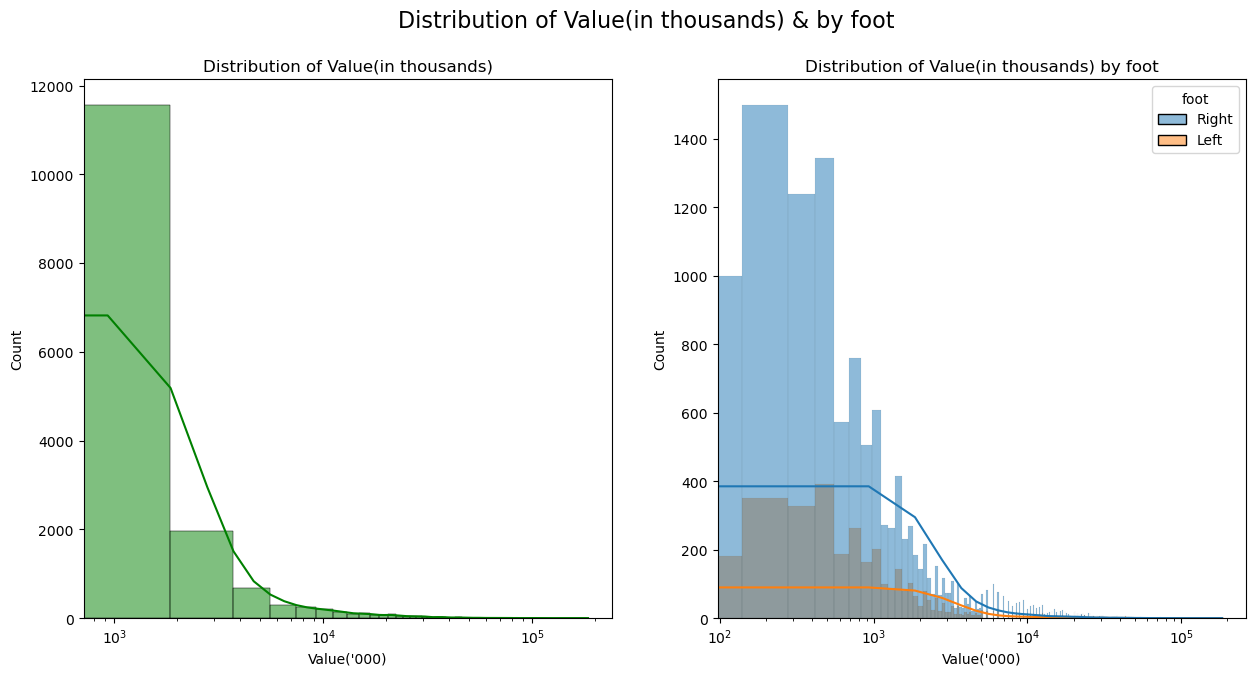

In [115]:
# Define the variable for the column used for the hue
X = 'foot'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram
plt.subplot(121)
sns.histplot(data=df, x="Value('000)", bins=100, kde=True, color='g')
plt.title('Distribution of Value(in thousands)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Plot the second histogram
plt.subplot(122)
sns.histplot(data=df, x="Value('000)", kde=True, hue=X)
plt.title(f'Distribution of Value(in thousands) by {X}')
plt.xscale('log')  # Set the x-axis scale to logarithmic


# Add an overall title to the chart
plt.suptitle(f'Distribution of Value(in thousands) & by {X}', fontsize=16)

# Display the chart
plt.show()

### Best Position

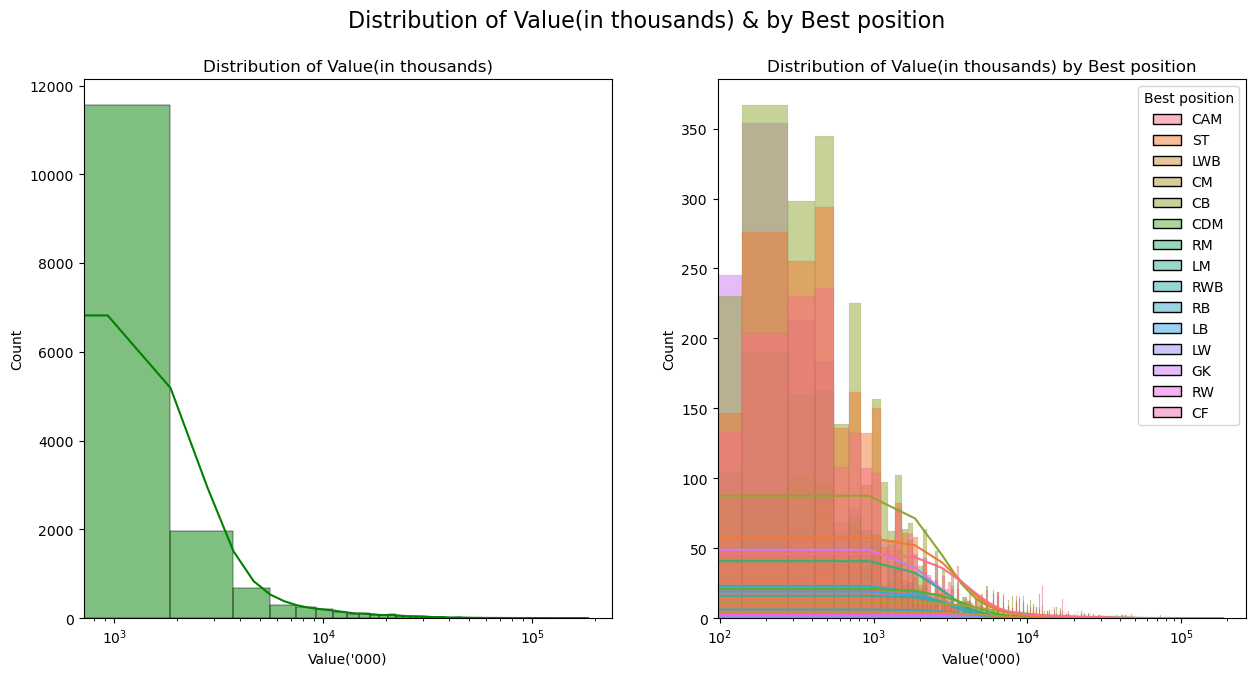

In [116]:
# Define the variable for the column used for the hue
X = 'Best position'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram
plt.subplot(121)
sns.histplot(data=df, x="Value('000)", bins=100, kde=True, color='g')
plt.title('Distribution of Value(in thousands)')
plt.xscale('log')  # Set the x-axis scale to logarithmic

# Plot the second histogram
plt.subplot(122)
sns.histplot(data=df, x="Value('000)", kde=True, hue=X)
plt.title(f'Distribution of Value(in thousands) by {X}')
plt.xscale('log')  # Set the x-axis scale to logarithmic


# Add an overall title to the chart
plt.suptitle(f'Distribution of Value(in thousands) & by {X}', fontsize=16)

# Display the chart
plt.show()

### <b><span style='color:#FFCE30'> 7.2 |</span> Target variable distribution</b>
- Make the pair plots for each numerical variable one by one with Value, keep hue as foot


In [ ]:
# Select columns with numeric data type
numeric_columns = df.select_dtypes(exclude=['object'])
numeric_columns

Age  Overall rating  Potential  Height  Weight  Best overall  Growth  \
ID                                                                             
28130    34              78         78     182      76            77       0   
260145   19              65         81     174      65            67      16   
231410   23              82         86     170      68            84       4   
70728    17              62         80     178      72            65      18   
225667   26              74         75     168      69            75       1   
...     ...             ...        ...     ...     ...           ...     ...   
262935   22              64         73     182      80            66       9   
262936   18              58         68     178      68            60      10   
262939   20              60         73     190      80            60      13   
262941   18              56         70     180      72            61      14   
262942   21              62         70     182      76            65       8   

        Total attacking  Crossing  Finishing  Heading accuracy  Short passing  \
ID                                                                              
28130               367        84         69                50             82   
260145              266        48         53                49             66   
231410              328        75         76                30             83   
70728               257        48         53                45             67   
225667              358        63         79                73             73   
...                 ...       ...        ...               ...            ...   
262935              283        51         55                62             72   
262936              238        40         53                41             62   
262939               58        11          7                14             21   
262941              257        43         59                52             63   
262942              291        62         58                56             63   

        Volleys  Total skill  Dribbling  Curve  FK Accuracy  Long passing  \
ID                                                                          
28130        82          430         86     86           87            81   
260145       50          304         69     52           50            65   
231410       64          379         84     74           61            75   
70728        44          292         66     52           43            65   
225667       70          352         72     72           68            65   
...         ...          ...        ...    ...          ...           ...   
262935       47          276         60     48           43            69   
262936       42          273         64     50           47            51   
262939        5           79         13     11           11            28   
262941       40          274         67     51           39            53   
262942       52          293         63     54           55            60   

        Ball control  Total movement  Acceleration  Sprint speed  Agility  \
ID                                                                          
28130             90             313            50            48       73   
260145            68             366            76            69       81   
231410            85             429            85            85       89   
70728             66             356            77            68       78   
225667            75             417            81            83       89   
...              ...             ...           ...           ...      ...   
262935            62             316            59            67       61   
262936            61             318            63            65       66   
262939            16             164            26            25       28   
262941            64             320            69            75

### Overall rating

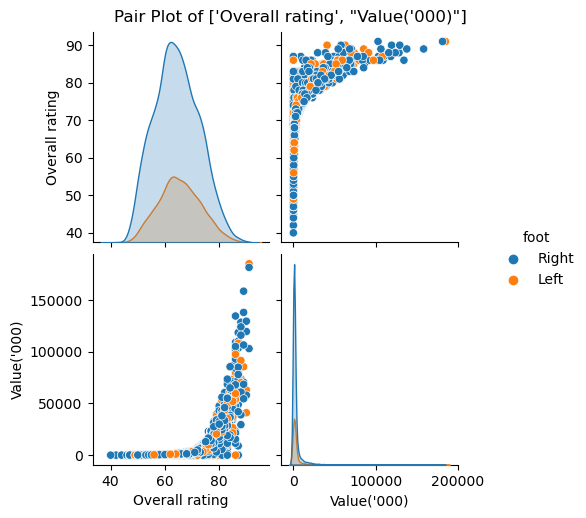

In [118]:
# Define the numeric variables to be plotted
numeric_variables = ['Overall rating', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Potential

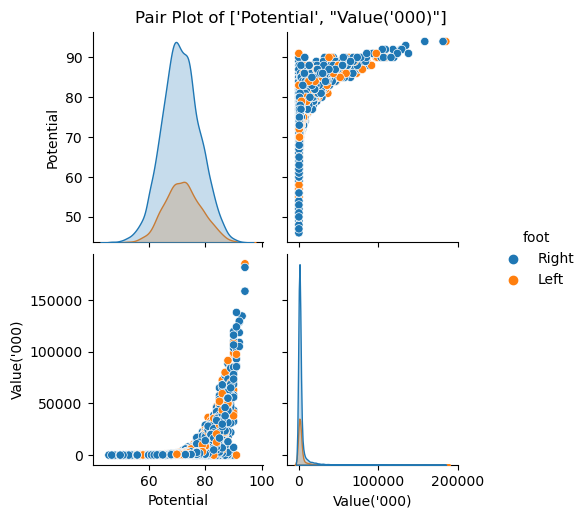

In [120]:
# Define the numeric variables to be plotted
numeric_variables = ['Potential', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Crossing

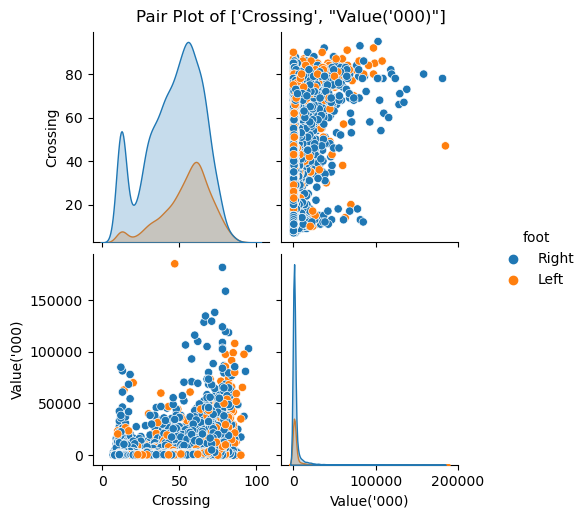

In [121]:
# Define the numeric variables to be plotted
numeric_variables = ['Crossing', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Finishing

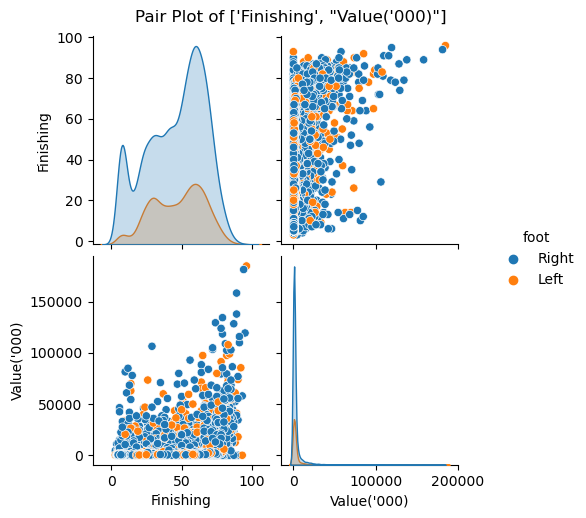

In [122]:
# Define the numeric variables to be plotted
numeric_variables = ['Finishing', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Heading accuracy

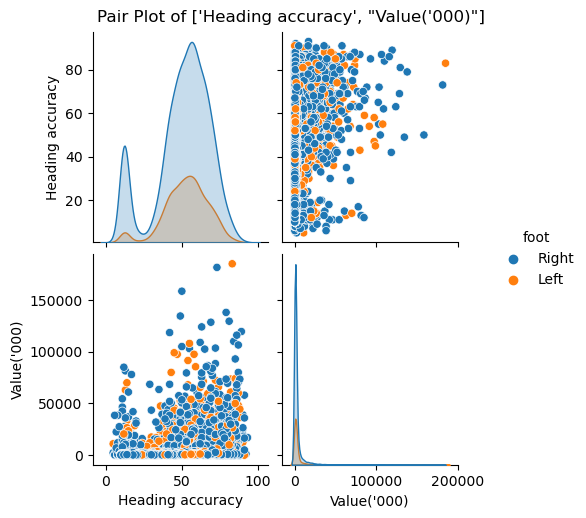

In [124]:
# Define the numeric variables to be plotted
numeric_variables = ['Heading accuracy', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Short passing

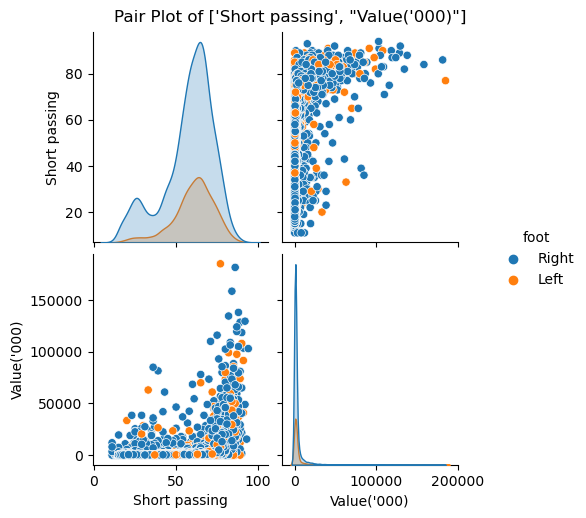

In [125]:
# Define the numeric variables to be plotted
numeric_variables = ['Short passing', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Volleys

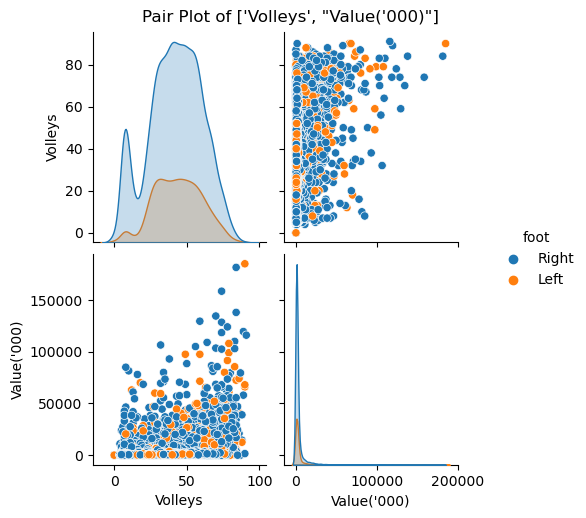

In [127]:
# Define the numeric variables to be plotted
numeric_variables = ['Volleys', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Dribbling

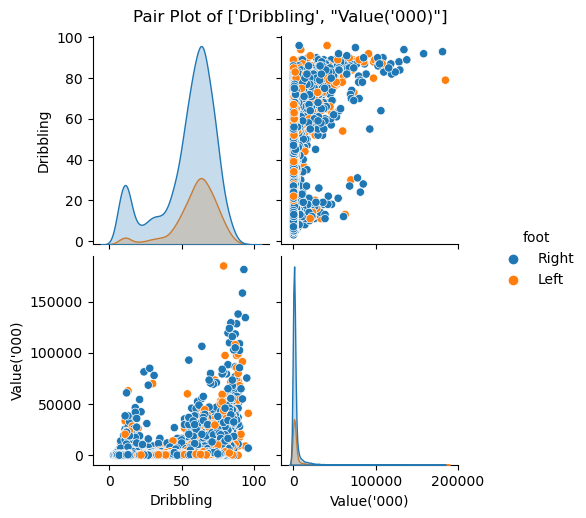

In [128]:
# Define the numeric variables to be plotted
numeric_variables = ['Dribbling', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Curve

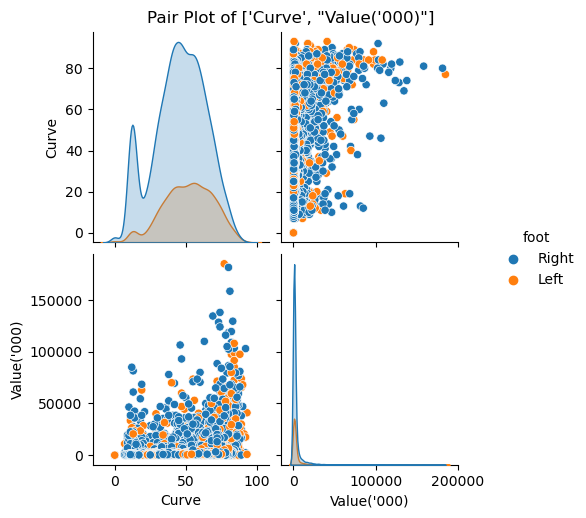

In [129]:
# Define the numeric variables to be plotted
numeric_variables = ['Curve', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### FK Accuracy

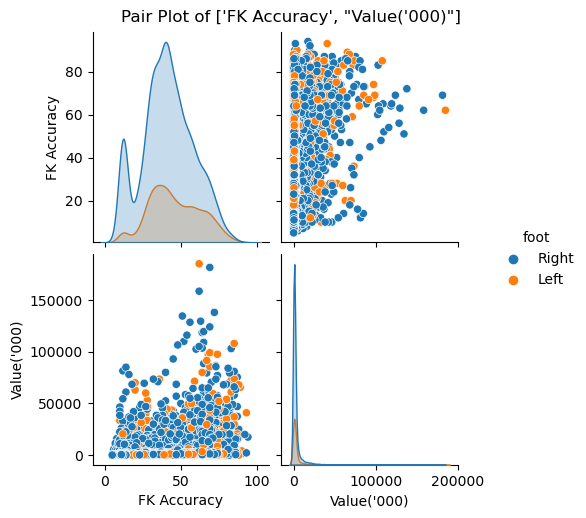

In [130]:
# Define the numeric variables to be plotted
numeric_variables = ['FK Accuracy', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### 'Long passing'

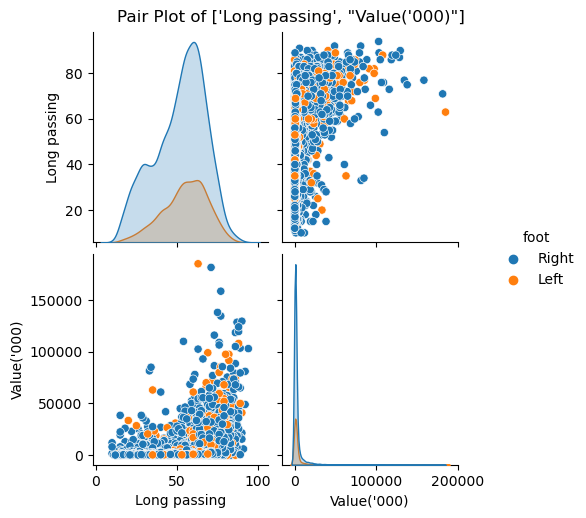

In [131]:
# Define the numeric variables to be plotted
numeric_variables = ['Long passing', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Ball control

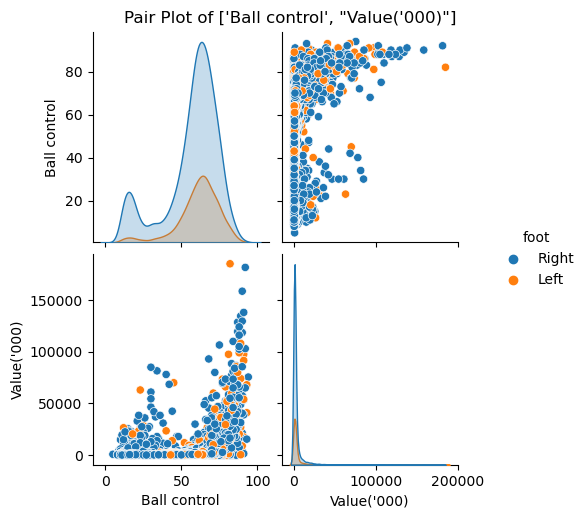

In [132]:
# Define the numeric variables to be plotted
numeric_variables = ['Ball control', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Acceleration

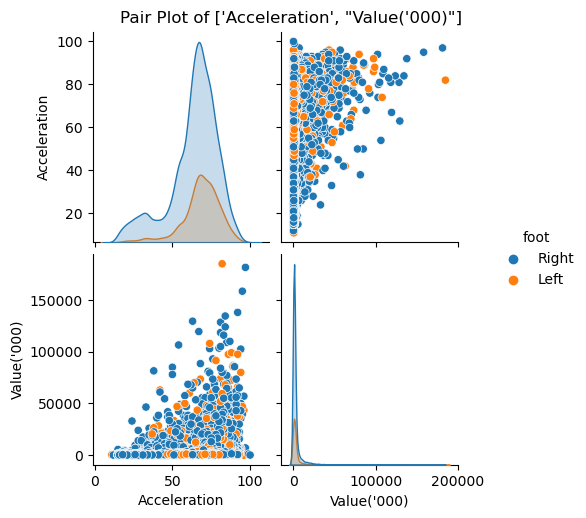

In [133]:
# Define the numeric variables to be plotted
numeric_variables = ['Acceleration', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Sprint speed

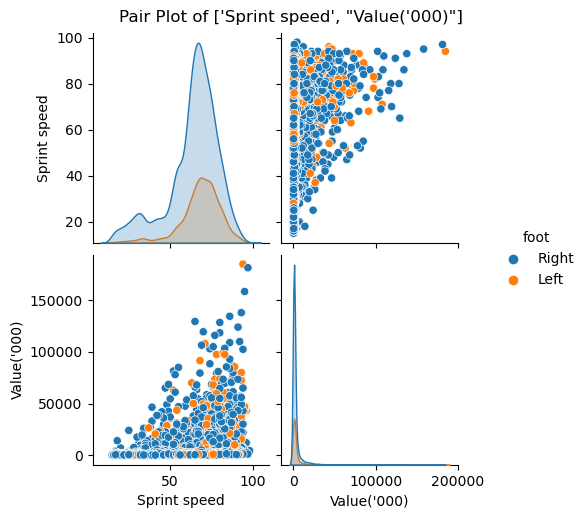

In [134]:
# Define the numeric variables to be plotted
numeric_variables = ['Sprint speed', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Agility

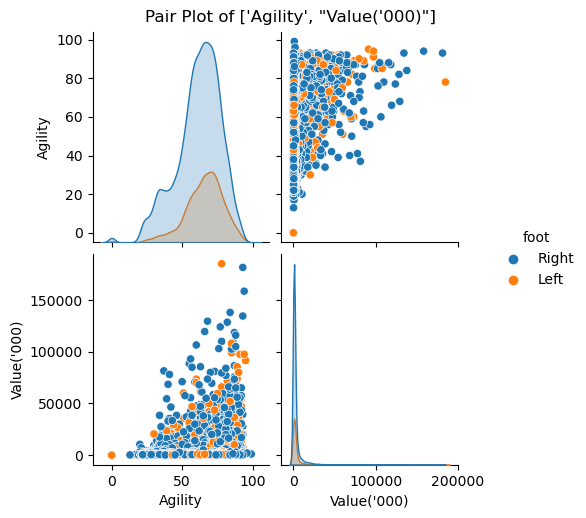

In [135]:
# Define the numeric variables to be plotted
numeric_variables = ['Agility', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Reactions

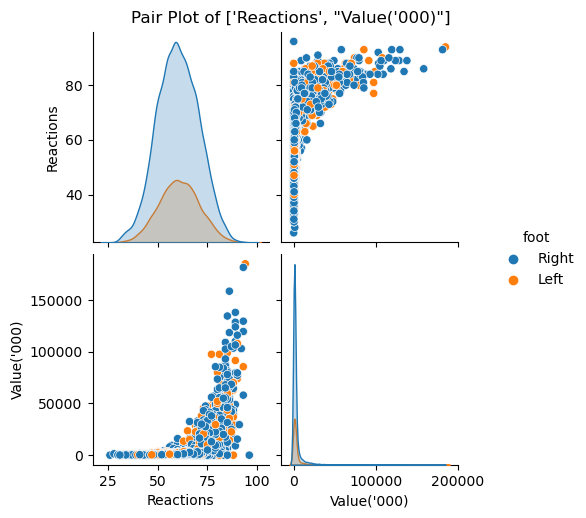

In [136]:
# Define the numeric variables to be plotted
numeric_variables = ['Reactions', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Balance

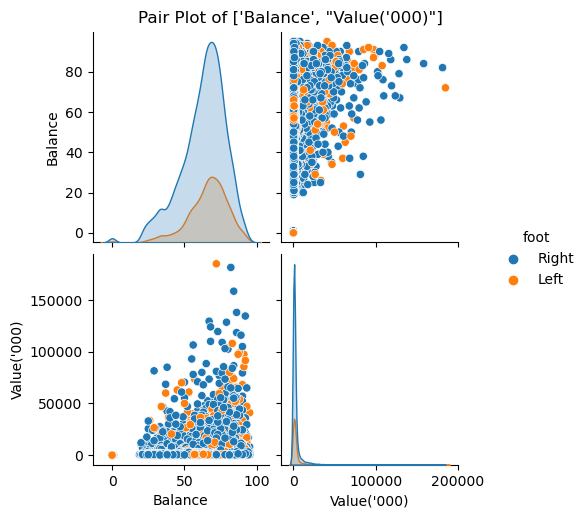

In [137]:
# Define the numeric variables to be plotted
numeric_variables = ['Balance', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Shot power

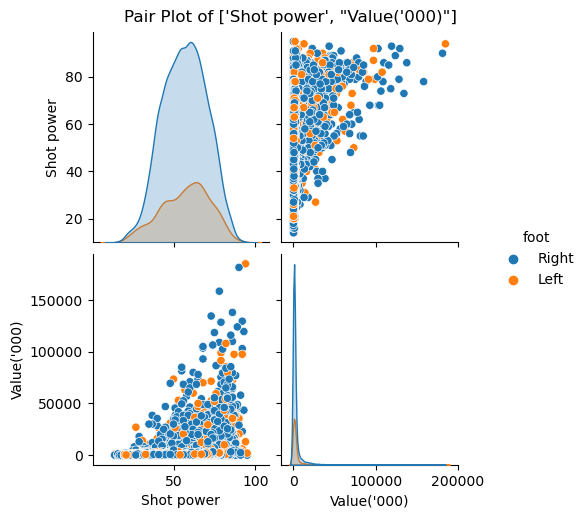

In [138]:
# Define the numeric variables to be plotted
numeric_variables = ['Shot power', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Jumping

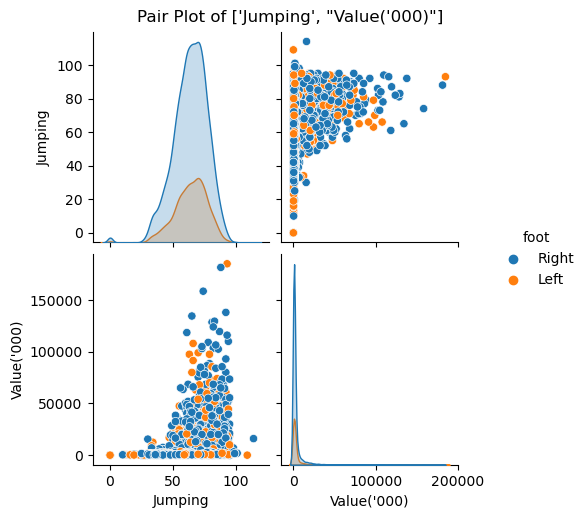

In [139]:
# Define the numeric variables to be plotted
numeric_variables = ['Jumping', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Stamina

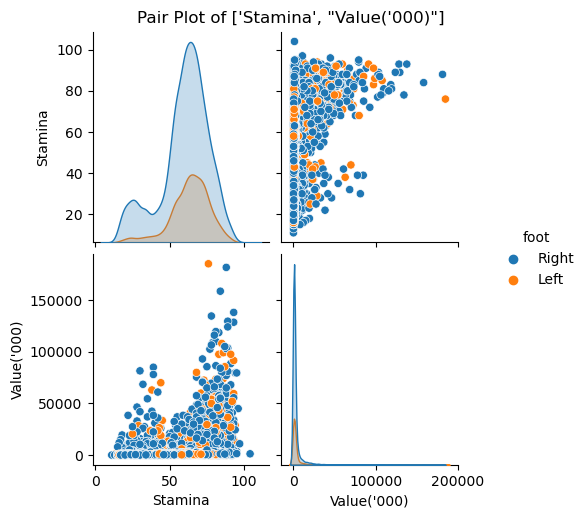

In [140]:
# Define the numeric variables to be plotted
numeric_variables = ['Stamina', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Strength

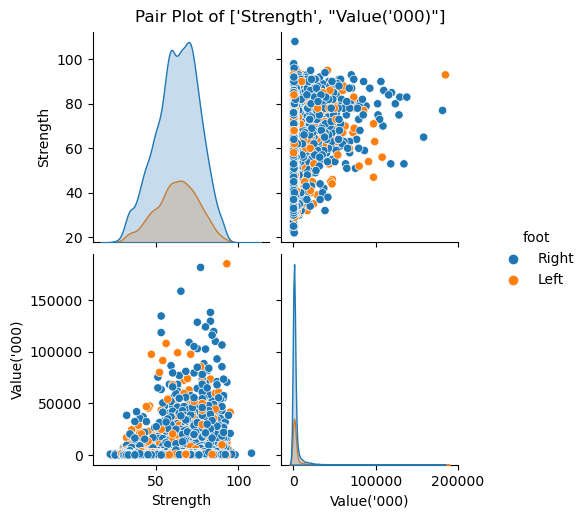

In [141]:
# Define the numeric variables to be plotted
numeric_variables = ['Strength', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Long shots

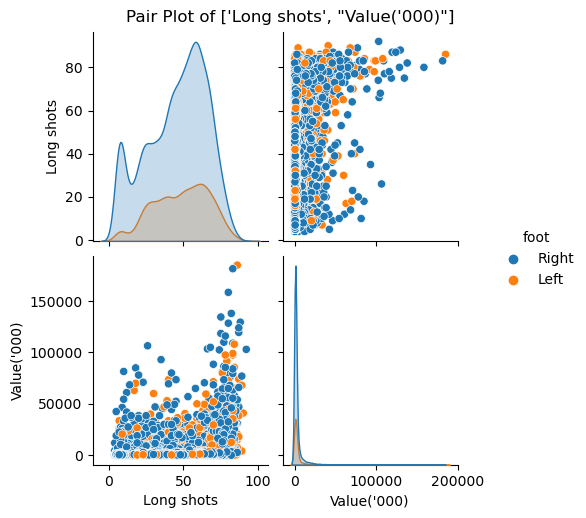

In [142]:
# Define the numeric variables to be plotted
numeric_variables = ['Long shots', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Aggression

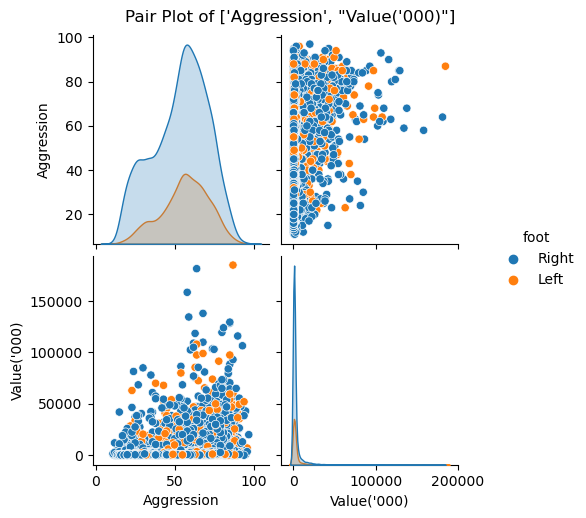

In [143]:
# Define the numeric variables to be plotted
numeric_variables = ['Aggression', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Interceptions

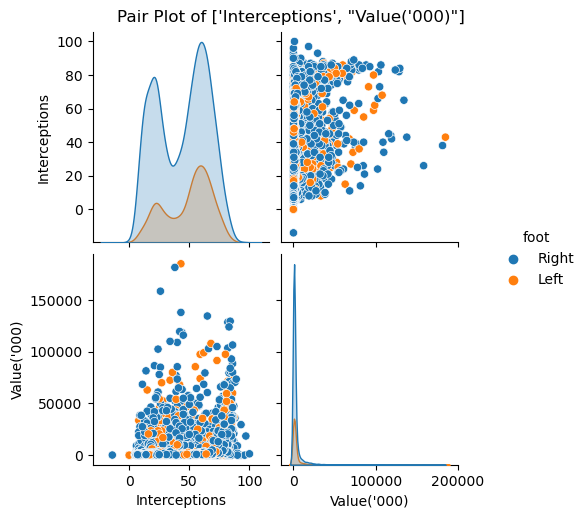

In [144]:
# Define the numeric variables to be plotted
numeric_variables = ['Interceptions', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Att. Position

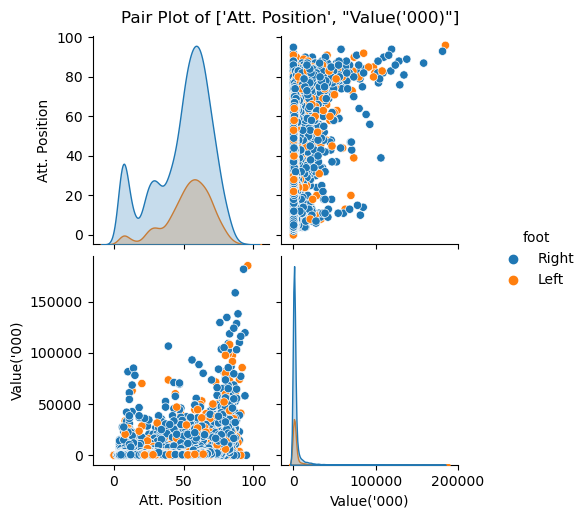

In [145]:
# Define the numeric variables to be plotted
numeric_variables = ['Att. Position', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Vision

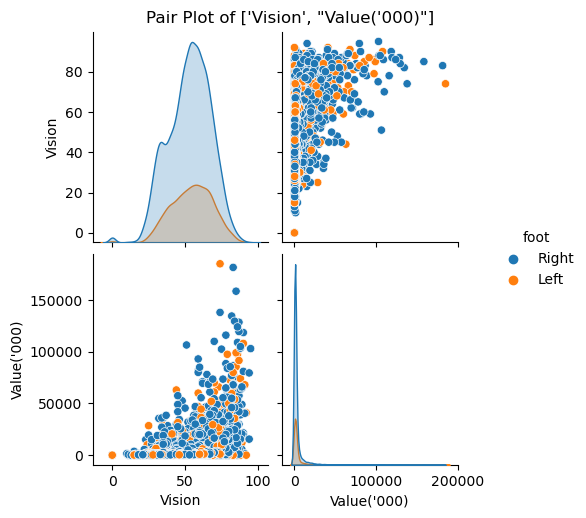

In [146]:
# Define the numeric variables to be plotted
numeric_variables = ['Vision', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Penalties

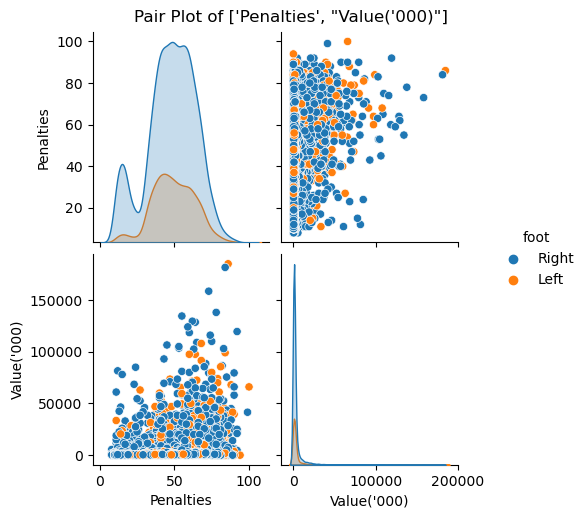

In [147]:
# Define the numeric variables to be plotted
numeric_variables = ['Penalties', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Composure

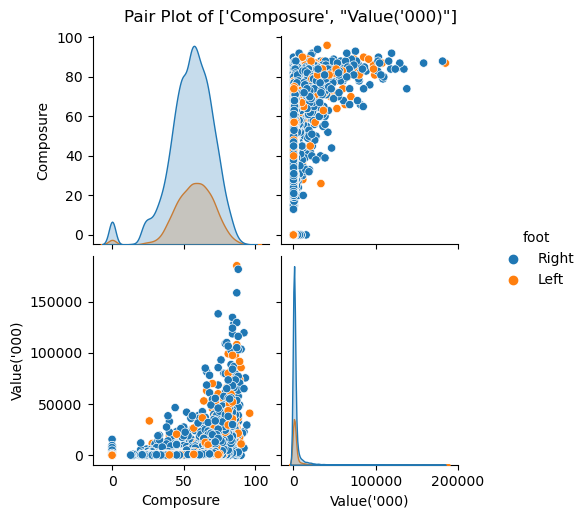

In [148]:
# Define the numeric variables to be plotted
numeric_variables = ['Composure', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Defensive awareness

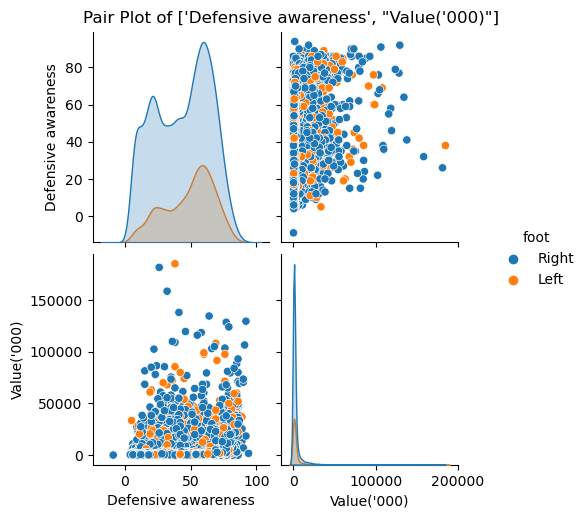

In [149]:
# Define the numeric variables to be plotted
numeric_variables = ['Defensive awareness', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Standing tackle

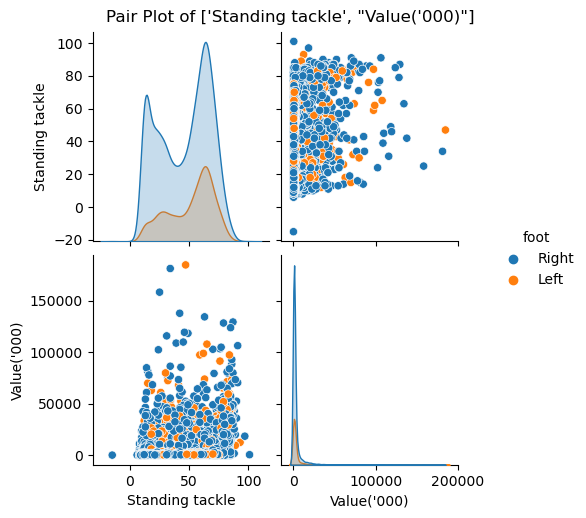

In [150]:
# Define the numeric variables to be plotted
numeric_variables = ['Standing tackle', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### Sliding tackle

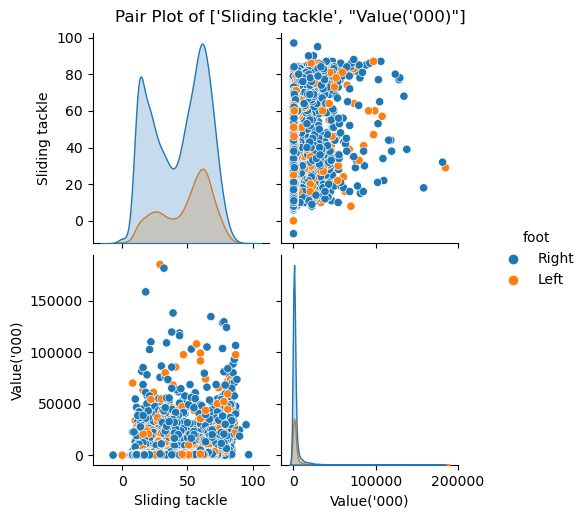

In [151]:
# Define the numeric variables to be plotted
numeric_variables = ['Sliding tackle', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### GK Diving

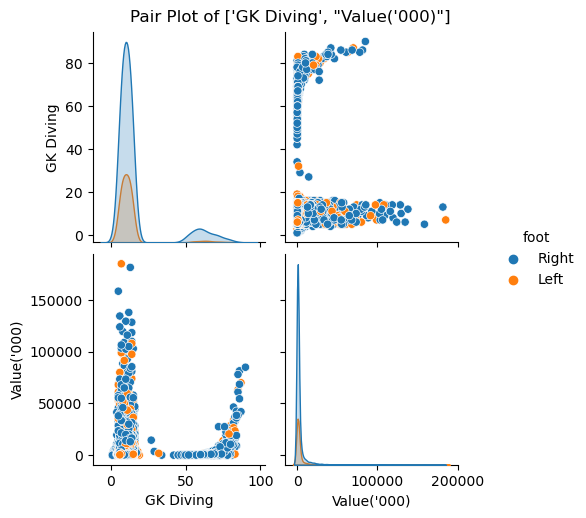

In [152]:
# Define the numeric variables to be plotted
numeric_variables = ['GK Diving', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### GK Handling

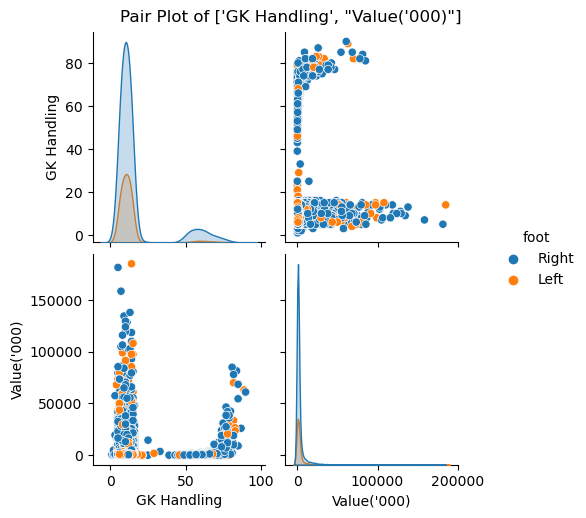

In [153]:
# Define the numeric variables to be plotted
numeric_variables = ['GK Handling', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### GK Kicking

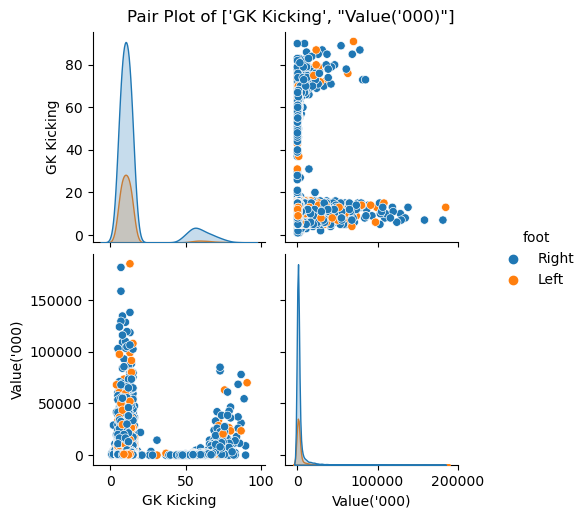

In [154]:
# Define the numeric variables to be plotted
numeric_variables = ['GK Kicking', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### GK Positioning

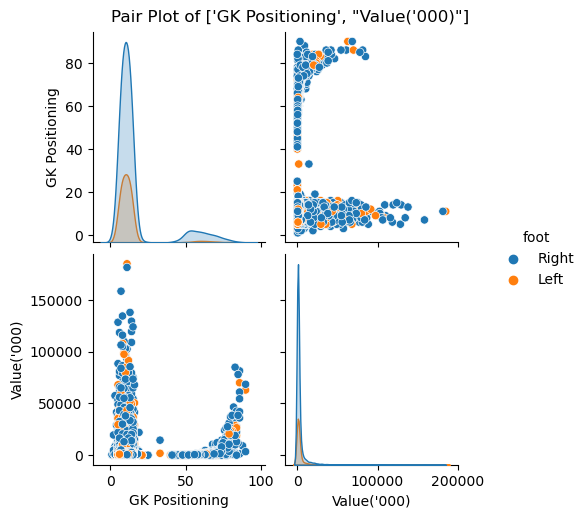

In [155]:
# Define the numeric variables to be plotted
numeric_variables = ['GK Positioning', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### GK Reflexes

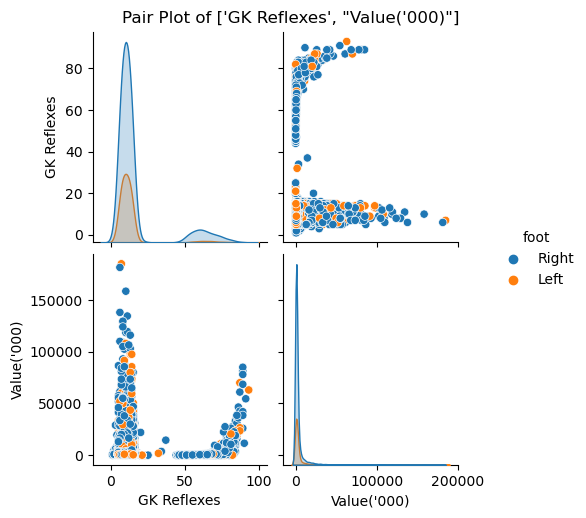

In [156]:
# Define the numeric variables to be plotted
numeric_variables = ['GK Reflexes', "Value('000)"]

# Create a pair plot to visualize the relationships
sns.pairplot(df, vars=numeric_variables, kind='scatter', diag_kind='kde', hue='foot')
plt.suptitle(f'Pair Plot of {numeric_variables}', y=1.02)
plt.show()

### <b><span style='color:#FFCE30'> 7.3 |</span> Correlation Analysis</b>
- Check for multicollinearity

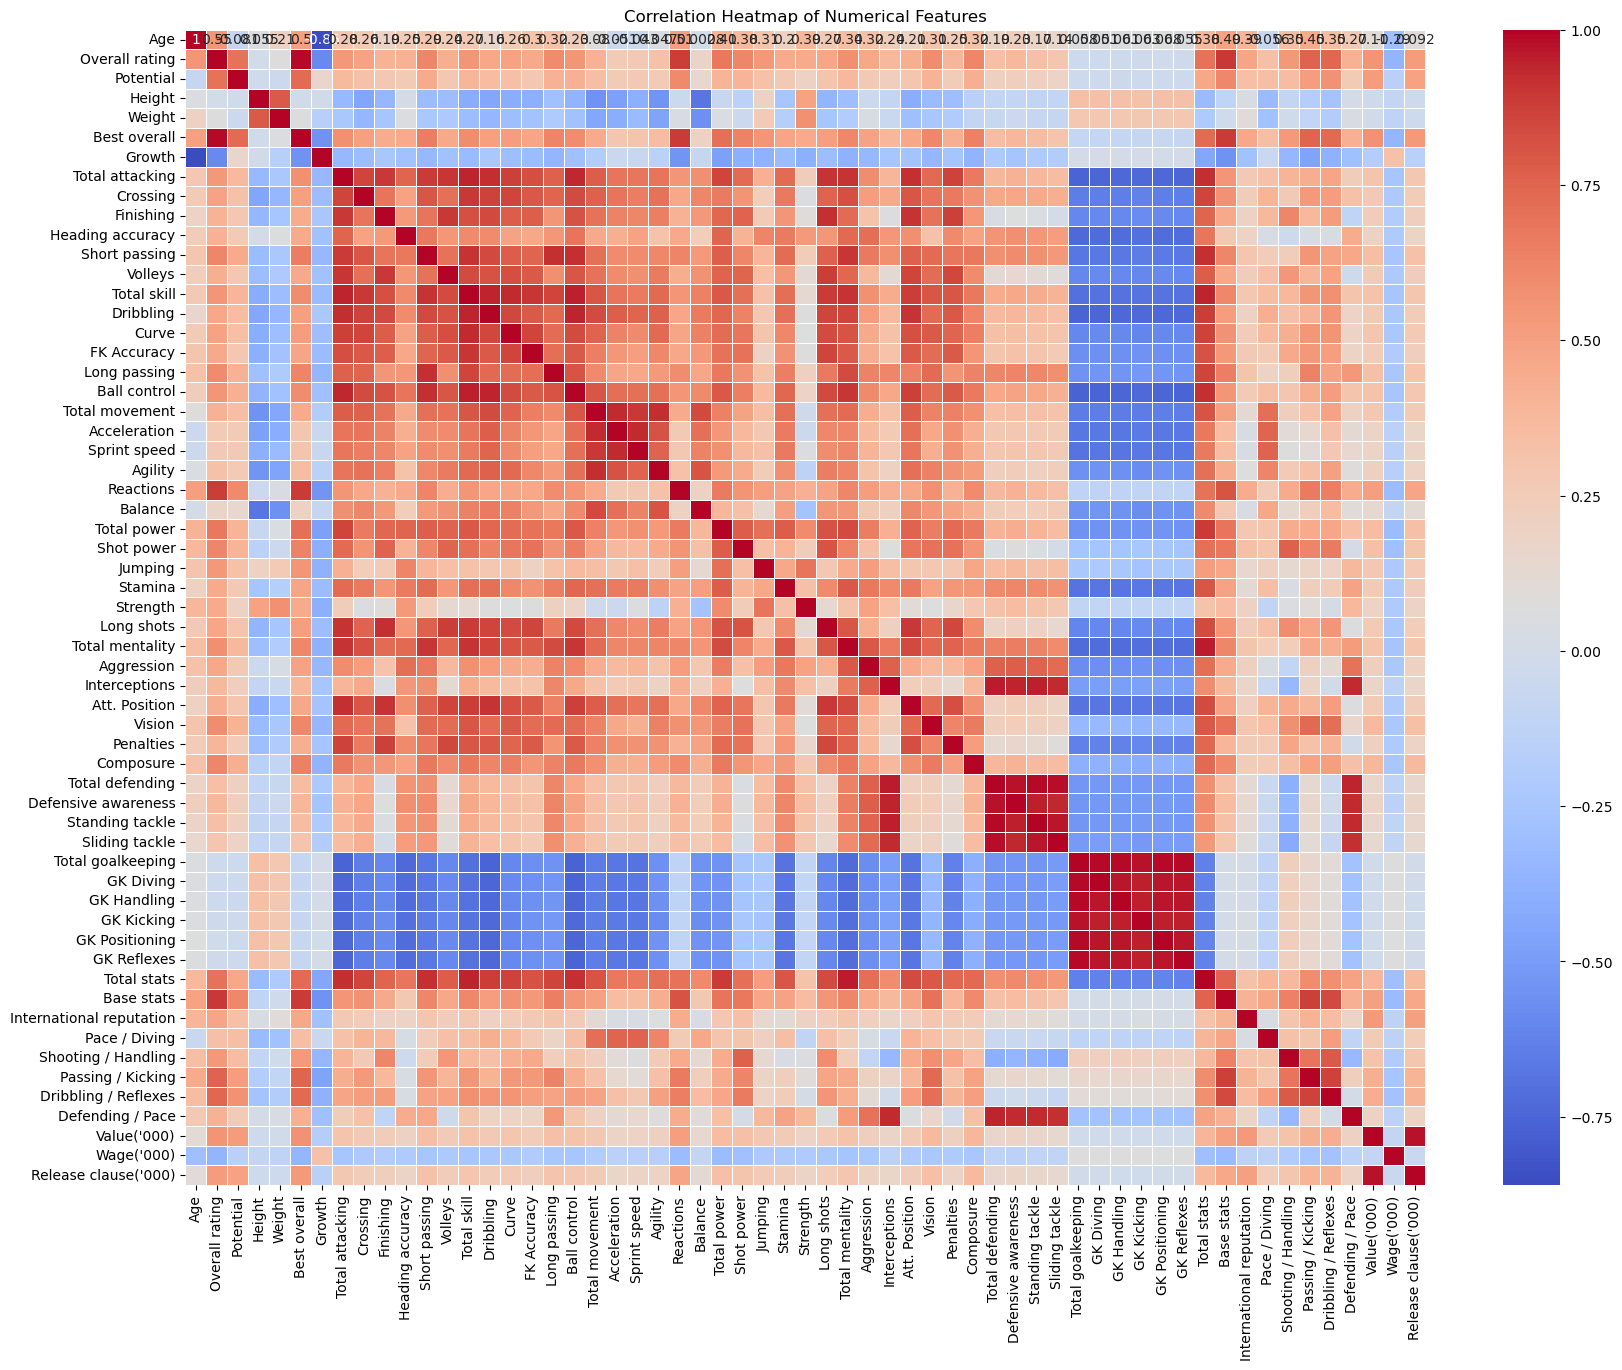

In [159]:
# Calculate the correlation matrix for numerical features only
correlation_matrix = df[numeric_columns.columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm',linewidths=0.5, annot=correlation_matrix.values)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### <b><span style='color:#FFCE30'> 7.4 |</span> VIF Analysis</b>


In [161]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(len(numeric_columns.columns))]

# Sort the VIF data in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display the sorted VIF DataFrame
print(vif_data_sorted)

                     Feature           VIF
31           Total mentality           inf
7            Total attacking           inf
42         Total goalkeeping           inf
48               Total stats           inf
38           Total defending           inf
13               Total skill           inf
19            Total movement           inf
25               Total power           inf
2                  Potential  6.148594e+04
1             Overall rating  5.580209e+04
49                Base stats  2.745963e+04
5               Best overall  5.973272e+03
51             Pace / Diving  4.326568e+03
54      Dribbling / Reflexes  3.372649e+03
11             Short passing  3.167074e+03
52       Shooting / Handling  2.688271e+03
10          Heading accuracy  2.469921e+03
55          Defending / Pace  2.228135e+03
8                   Crossing  2.227042e+03
18              Ball control  2.223664e+03
9                  Finishing  2.205361e+03
14                 Dribbling  2.195154e+03
21         

### <b><span style='color:#FFCE30'> 7.5 |</span> Feature Importance</b>


In [166]:
df.head()

Age  Overall rating  Potential  Height  Weight   foot  Best overall  \
ID                                                                            
28130    34              78         78     182      76  Right            77   
260145   19              65         81     174      65   Left            67   
231410   23              82         86     170      68  Right            84   
70728    17              62         80     178      72  Right            65   
225667   26              74         75     168      69   Left            75   

       Best position  Growth   Value   Wage Release clause  Total attacking  \
ID                                                                            
28130            CAM       0   €4.1M   €45K             €0              367   
260145           CAM      16   €1.8M    €3K          €4.5M              266   
231410           CAM       4  €43.5M  €145K         €92.4M              328   
70728            CAM      18     €1M   €900          €2.3M              257   
225667            ST       1     €5M   €19K          €9.9M              358   

        Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
ID                                                                      
28130         84         69                50             82       82   
260145        48         53                49             66       50   
231410        75         76                30             83       64   
70728         48         53                45             67       44   
225667        63         79                73             73       70   

        Total skill  Dribbling  Curve  FK Accuracy  Long passing  \
ID                                                                 
28130           430         86     86           87            81   
260145          304         69     52           50            65   
231410          379         84     74           61            75   
70728           292         66     52           43            65   
225667          352         72     72           68            65   

        Ball control  Total movement  Acceleration  Sprint speed  Agility  \
ID                                                                          
28130             90             313            50            48       73   
260145            68             366            76            69       81   
231410            85             429            85            85       89   
70728             66             356            77            68       78   
225667            75             417            81            83       89   

        Reactions  Balance  Total power  Shot power  Jumping  Stamina  \
ID                                                                      
28130          70       72          314          74       55       41   
260145         61       79          272          62       56       63   
231410         79       91          332          73       60       68   
70728          59       74          267          48       58       63   
225667         73       91          346          72       75       74   

        Strength  Long shots  Total mentality  Aggression  Interceptions  \
ID                                                                         
28130         72          72              319          60             25   
260145        47          44              264          41             37   
231410        55          76              294          44             33   
70728         51          47              263          47             54   
225667        50          75              322          70             40   

        Att. Position  Vision  Penalties  Composure  Total defending  \
ID                                                                     
28130              66      82         86          0               78   
260145             60      65         61         63              140   
231410             78      81         

### Preprocess data to run feature importance

In [169]:
# Drop the specified columns
df = df.drop(columns=['Value', 'Wage', 'Release clause'])

# Ordinal encode 'foot' and 'Best position'
encoder = OrdinalEncoder()
columns_to_encode = ['foot', 'Best position']
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

df.head()

Age  Overall rating  Potential  Height  Weight  foot  Best overall  \
ID                                                                           
28130    34              78         78     182      76   1.0            77   
260145   19              65         81     174      65   0.0            67   
231410   23              82         86     170      68   1.0            84   
70728    17              62         80     178      72   1.0            65   
225667   26              74         75     168      69   0.0            75   

        Best position  Growth  Total attacking  Crossing  Finishing  \
ID                                                                    
28130             0.0       0              367        84         69   
260145            0.0      16              266        48         53   
231410            0.0       4              328        75         76   
70728             0.0      18              257        48         53   
225667           14.0       1              358        63         79   

        Heading accuracy  Short passing  Volleys  Total skill  Dribbling  \
ID                                                                         
28130                 50             82       82          430         86   
260145                49             66       50          304         69   
231410                30             83       64          379         84   
70728                 45             67       44          292         66   
225667                73             73       70          352         72   

        Curve  FK Accuracy  Long passing  Ball control  Total movement  \
ID                                                                       
28130      86           87            81            90             313   
260145     52           50            65            68             366   
231410     74           61            75            85             429   
70728      52           43            65            66             356   
225667     72           68            65            75             417   

        Acceleration  Sprint speed  Agility  Reactions  Balance  Total power  \
ID                                                                             
28130             50            48       73         70       72          314   
260145            76            69       81         61       79          272   
231410            85            85       89         79       91          332   
70728             77            68       78         59       74          267   
225667            81            83       89         73       91          346   

        Shot power  Jumping  Stamina  Strength  Long shots  Total mentality  \
ID                                                                            
28130           74       55       41        72          72              319   
260145          62       56       63        47          44              264   
231410          73       60       68        55          76              294   
70728           48       58       63        51          47              263   
225667          72       75       74        50          75              322   

        Aggression  Interceptions  Att. Position  Vision  Penalties  \
ID                                                                    
28130           60             25             66      82         86   
260145          41             37             60      65         61   
231410          44             33             78      81         58   
70728           47             54             54      59         49   
225667          70             40             74      72         66   

        Composure  Total defending  Defensive awareness  Standing tackle  \
ID                                                                         
28130           0               78                   25               28   
260145         63              140                   40               

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16013 entries, 28130 to 262942
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16013 non-null  int64  
 1   Overall rating            16013 non-null  int64  
 2   Potential                 16013 non-null  int64  
 3   Height                    16013 non-null  int64  
 4   Weight                    16013 non-null  int64  
 5   foot                      16013 non-null  float64
 6   Best overall              16013 non-null  int64  
 7   Best position             16013 non-null  float64
 8   Growth                    16013 non-null  int64  
 9   Total attacking           16013 non-null  int64  
 10  Crossing                  16013 non-null  int64  
 11  Finishing                 16013 non-null  int64  
 12  Heading accuracy          16013 non-null  int64  
 13  Short passing             16013 non-null  int64  
 14  Volley

### Feature importance plot

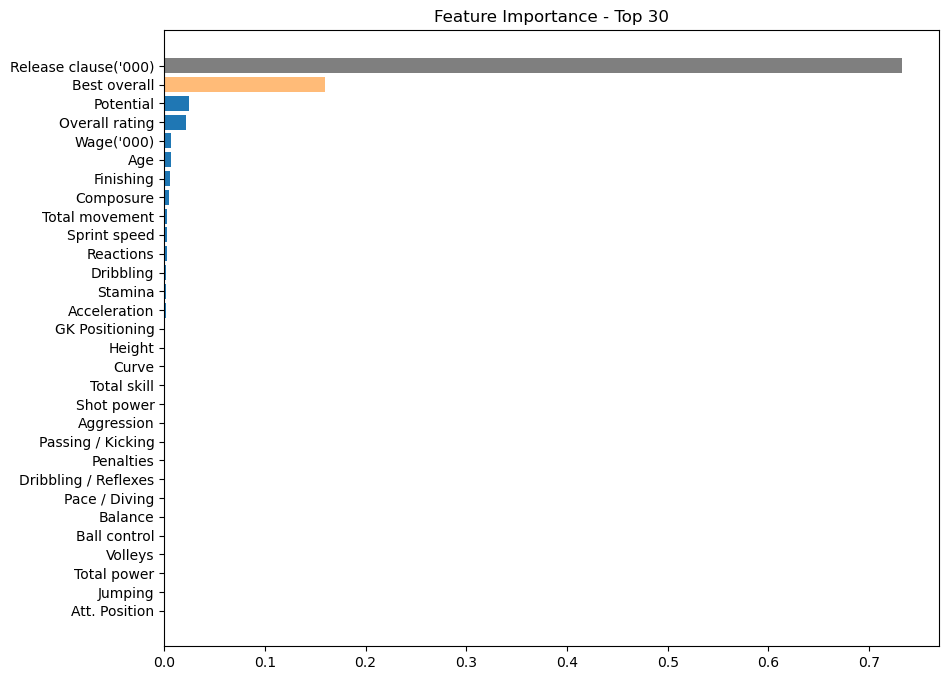

In [171]:
TOP = 30   # Define the number of top features to plot


# Define features and target variable
X = df.drop(columns=["Value('000)"])
y = df["Value('000)"]

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Fit the model
xgb_reg.fit(X, y)

# Get feature importance
feature_importance = xgb_reg.feature_importances_

# Get the feature names from 'X'
feature_names = X.columns

# Create a colormap
cmap = plt.get_cmap('tab20')

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center', color=cmap(feature_importance[sorted_idx][-TOP:]))
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()


### SHAP Analysis

In [173]:
# pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   ------------------------- -------------- 286.7/453.1 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [174]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_reg)

# Compute SHAP values
shap_values = explainer.shap_values(X)


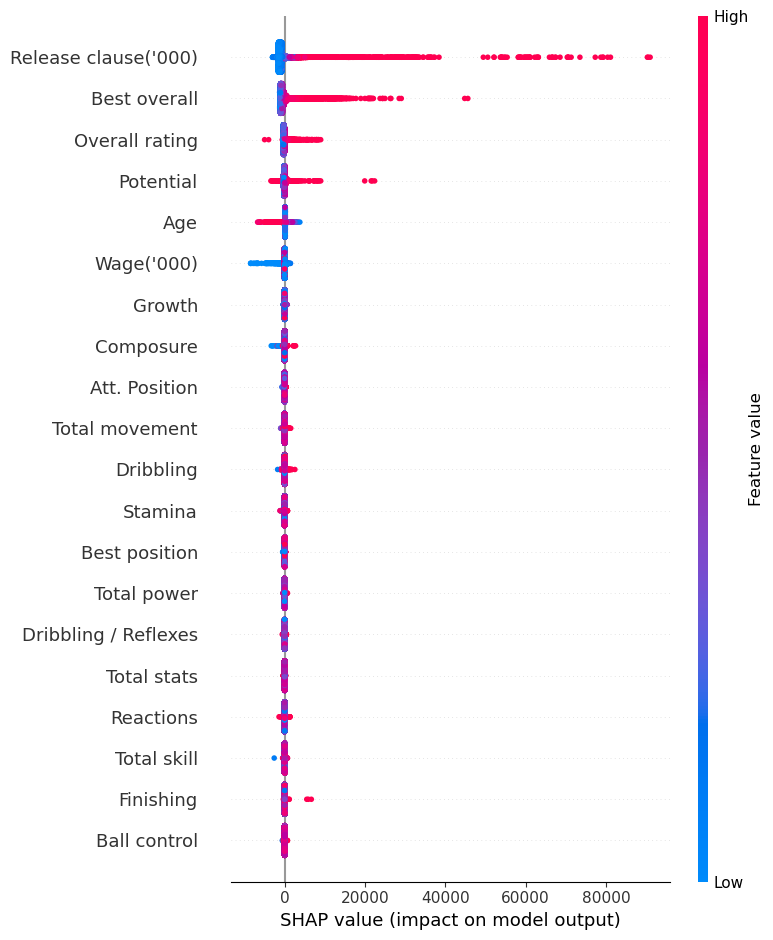

In [175]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X)


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>8 |</span></b> <b>SUMMARY </b></div>

### <b><span style='color:#FFCE30'> 8.1 |</span> Data Preprocessing</b>

| No. | Action | Reason|
| --- | ------ | ------|
|1| Drop Columns: Unnamed: 64, Name, Team & Contract| Nan Values, or not useful|
|2| Drop duplicated rows | Duplicated rows needds to be removed|
|3| For these variable we need to make the summation or subtraction for some entries and convert to numeric: Overall rating, potential, Crossing, Finishing, Heading accuracy, Short passing, Volleys, Dribbling, Curve, FK Accuracy, Long passing, Ball Control, Acceleration, Sprint speed, Agility, Reactions, Balance, Shot power, Jumping, Stamina, Strength, Long Shots, Aggression, Interceptions, Att. Position, Vision, Penalties, Composure, Defensive awareness, Standing tackle, Sliding tackle', GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes | Convert object to numeric|
|4|  For these features we need to treat: Height (take the interger for cm) , Weight (take the interger for kg), Value (convert from to numeric), Wage (convert to numeric), Release Clause (convert to numeric),| Convert object to numeric |



### <b><span style='color:#FFCE30'> 8.2 |</span> Feature Selection and other consideration</b>

| No. | Action | Reason|
| --- | ------ | ------|
|1| Perform feature selection based on feature importance, drop columns with high VIF | Many columns with high VIF and multicollinerity | 
|2| Outliers in data | Perform Robust Scaling|

